In [2]:
#obtaining rough insitu vs exsitu bar graphs, and subhaloid of formations for counterrottating particles
#All subhalos of interest

import h5py
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import illustris_python as il
from tqdm import tqdm

def hdf5_to_dict(file_path):
    data_dict = {}
    
    with h5py.File(file_path, 'r') as hdf_file:
        # Recursively traverse the HDF5 file and populate the dictionary
        def traverse(name, obj):
            if isinstance(obj, h5py.Dataset):
                data_dict[name] = obj[()]  # Store dataset value in dictionary
            elif isinstance(obj, h5py.Group):
                # Create a nested dictionary for groups
                group_dict = {}
                data_dict[name] = group_dict
                
                # Recursively visit the group's children
                obj.visititems(traverse)
        
        hdf_file.visititems(traverse)
    
    return data_dict


def plot_total_insitu_exsitu(subhaloid,R200,data_rodriguez):
    #Extraccion de datos (se asume que ya esta cargada la data original de Rodriguez Gomez)
    filename = 'tables/subhalo'
    filename += str(subhaloid)
    filename += '.0.csv'

    subhalo_df = pd.read_csv(filename)
    data_contrarotante = data_rodriguez.copy()
    data_contrarotante_df = pd.DataFrame(data_contrarotante)
    
    #Sumando los dataframes(Se demora un vergo en esta parte)
    tqdm.pandas()
    complete_data_df = subhalo_df.merge(data_contrarotante_df, left_on='ParticleIDs', right_on='ParticleID').progress_apply(lambda avance: avance)
    complete_data_df = complete_data_df.drop('ParticleIDs', axis=1)
    complete_data_df.head()
    
    ######Graficador#######
    circle = np.linspace(0, 2 * np.pi, 100)
    fraction_plot_size = 0.3

    fig = plt.figure(figsize=(28.66, 20.46), dpi=200)
    outer = gridspec.GridSpec(1, 3, wspace=0.01, hspace=0.01)
    i = 0
    subhalo_df = complete_data_df
    inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)



    ax = plt.Subplot(fig, inner[0:4])
    histograma = ax.hist2d(subhalo_df['x'],subhalo_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
    circulo_interior = ax.plot((0.2*R200) * np.cos(circle), (0.2*R200) * np.sin(circle), zorder=15, label='Subhalo %s'%int(subhaloid), color='yellow')
    ax.axis('equal')
    ax.set_facecolor('black')
    xlocs = ax.get_xticks()
    ylocs = ax.get_yticks()
    textposx = (xlocs[1] + xlocs[0])/2
    textposy = ylocs[-3]
    escala_txt = str(int(xlocs[1] - xlocs[0]))
    escala_txt += 'kpc'
    fontprops = fm.FontProperties(size=20)
    scalebar = AnchoredSizeBar(ax.transData, int(xlocs[1] - xlocs[0]), escala_txt, 'upper center', pad=0.1, color='white', frameon=False, size_vertical=1, fontproperties=fontprops)
    ax.add_artist(scalebar)
    ax.text(.01,0.5,'Subhalo %s'%int(subhaloid), transform=ax.transAxes, color='white', ha='left', va='center', rotation='vertical', size=20)
    ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax)

    ax2 = plt.Subplot(fig, inner[4], sharex=ax)
    histograma2 = ax2.hist2d(subhalo_df['x'],subhalo_df['z'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
    ax2.axis('equal')
    ax2.set_facecolor('black')
    ax2.set(xlim=(-fraction_plot_size*R200, fraction_plot_size*R200), ylim=(-0.1*R200-1, 0.1*R200))
    ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax2.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax2)
    #Insitu
    i=1


    filtro_insitu = np.where(complete_data_df['InSitu'] == 1)[0]
    complete_data_df_insitu = complete_data_df.copy()
    complete_data_df_insitu = complete_data_df.loc[filtro_insitu]
    subhalo_df = complete_data_df_insitu
    inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)



    ax = plt.Subplot(fig, inner[0:4])
    histograma = ax.hist2d(subhalo_df['x'],subhalo_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
    circulo_interior = ax.plot((0.2*R200) * np.cos(circle), (0.2*R200) * np.sin(circle), zorder=15, label='Subhalo %s'%int(subhaloid), color='yellow')
    ax.axis('equal')
    ax.set_facecolor('black')
    xlocs = ax.get_xticks()
    ylocs = ax.get_yticks()
    textposx = (xlocs[1] + xlocs[0])/2
    textposy = ylocs[-3]
    escala_txt = str(int(xlocs[1] - xlocs[0]))
    escala_txt += 'kpc'
    fontprops = fm.FontProperties(size=20)
    scalebar = AnchoredSizeBar(ax.transData, int(xlocs[1] - xlocs[0]), escala_txt, 'upper center', pad=0.1, color='white', frameon=False, size_vertical=1, fontproperties=fontprops)
    ax.add_artist(scalebar)
    ax.text(.01,0.5,'Insitu', transform=ax.transAxes, color='white', ha='left', va='center', rotation='vertical', size=20)
    ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax)

    ax2 = plt.Subplot(fig, inner[4], sharex=ax)
    histograma2 = ax2.hist2d(subhalo_df['x'],subhalo_df['z'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
    ax2.axis('equal')
    ax2.set_facecolor('black')
    ax2.set(xlim=(-fraction_plot_size*R200, fraction_plot_size*R200), ylim=(-0.1*R200-1, 0.1*R200))
    ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax2.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax2)
    #Exsitu
    i=2

    filtro_exsitu = np.where(complete_data_df['InSitu'] == 0)[0]
    complete_data_df_exsitu = complete_data_df.copy()
    complete_data_df_exsitu = complete_data_df.loc[filtro_exsitu]
    subhalo_df = complete_data_df_exsitu
    inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)



    ax = plt.Subplot(fig, inner[0:4])
    histograma = ax.hist2d(subhalo_df['x'],subhalo_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
    circulo_interior = ax.plot((0.2*R200) * np.cos(circle), (0.2*R200) * np.sin(circle), zorder=15, label='Subhalo %s'%int(subhaloid), color='yellow')
    ax.axis('equal')
    ax.set_facecolor('black')
    xlocs = ax.get_xticks()
    ylocs = ax.get_yticks()
    textposx = (xlocs[1] + xlocs[0])/2
    textposy = ylocs[-3]
    escala_txt = str(int(xlocs[1] - xlocs[0]))
    escala_txt += 'kpc'
    fontprops = fm.FontProperties(size=20)
    scalebar = AnchoredSizeBar(ax.transData, int(xlocs[1] - xlocs[0]), escala_txt, 'upper center', pad=0.1, color='white', frameon=False, size_vertical=1, fontproperties=fontprops)
    ax.add_artist(scalebar)
    ax.text(.01,0.5,'Exsitu', transform=ax.transAxes, color='white', ha='left', va='center', rotation='vertical', size=20)
    ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax)

    ax2 = plt.Subplot(fig, inner[4], sharex=ax)
    histograma2 = ax2.hist2d(subhalo_df['x'],subhalo_df['z'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
    ax2.axis('equal')
    ax2.set_facecolor('black')
    ax2.set(xlim=(-fraction_plot_size*R200, fraction_plot_size*R200), ylim=(-0.1*R200-1, 0.1*R200))
    ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax2.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
    fig.add_subplot(ax2)


    fig.savefig('images/total_insitu_exsitu_%s.png'%subhaloid)
    return(print(subhaloid))

In [3]:
file_path = '/virgotng/universe/IllustrisTNG/L35n2160TNG/postprocessing/StellarAssembly/stars_099.hdf5'
data_rodriguez = hdf5_to_dict(file_path)

100%|██████████| 27/27 [00:00<00:00, 348.61it/s]


478216
1


100%|██████████| 27/27 [00:00<00:00, 243.50it/s]


501208
2


100%|██████████| 27/27 [00:00<00:00, 430.21it/s]


531910
3


100%|██████████| 27/27 [00:00<00:00, 406.71it/s]


547844
4


100%|██████████| 27/27 [00:00<00:00, 645.61it/s]


570319
5


100%|██████████| 27/27 [00:00<00:00, 528.45it/s]


571633
6


100%|██████████| 27/27 [00:00<00:00, 851.74it/s]


582137
7


100%|██████████| 27/27 [00:00<00:00, 717.69it/s]


589496
8


100%|██████████| 27/27 [00:00<00:00, 837.15it/s]


598112
9


100%|██████████| 27/27 [00:00<00:00, 952.04it/s]


606820
10


100%|██████████| 27/27 [00:00<00:00, 1304.05it/s]


619381
11


100%|██████████| 27/27 [00:00<00:00, 1252.40it/s]


628949
12


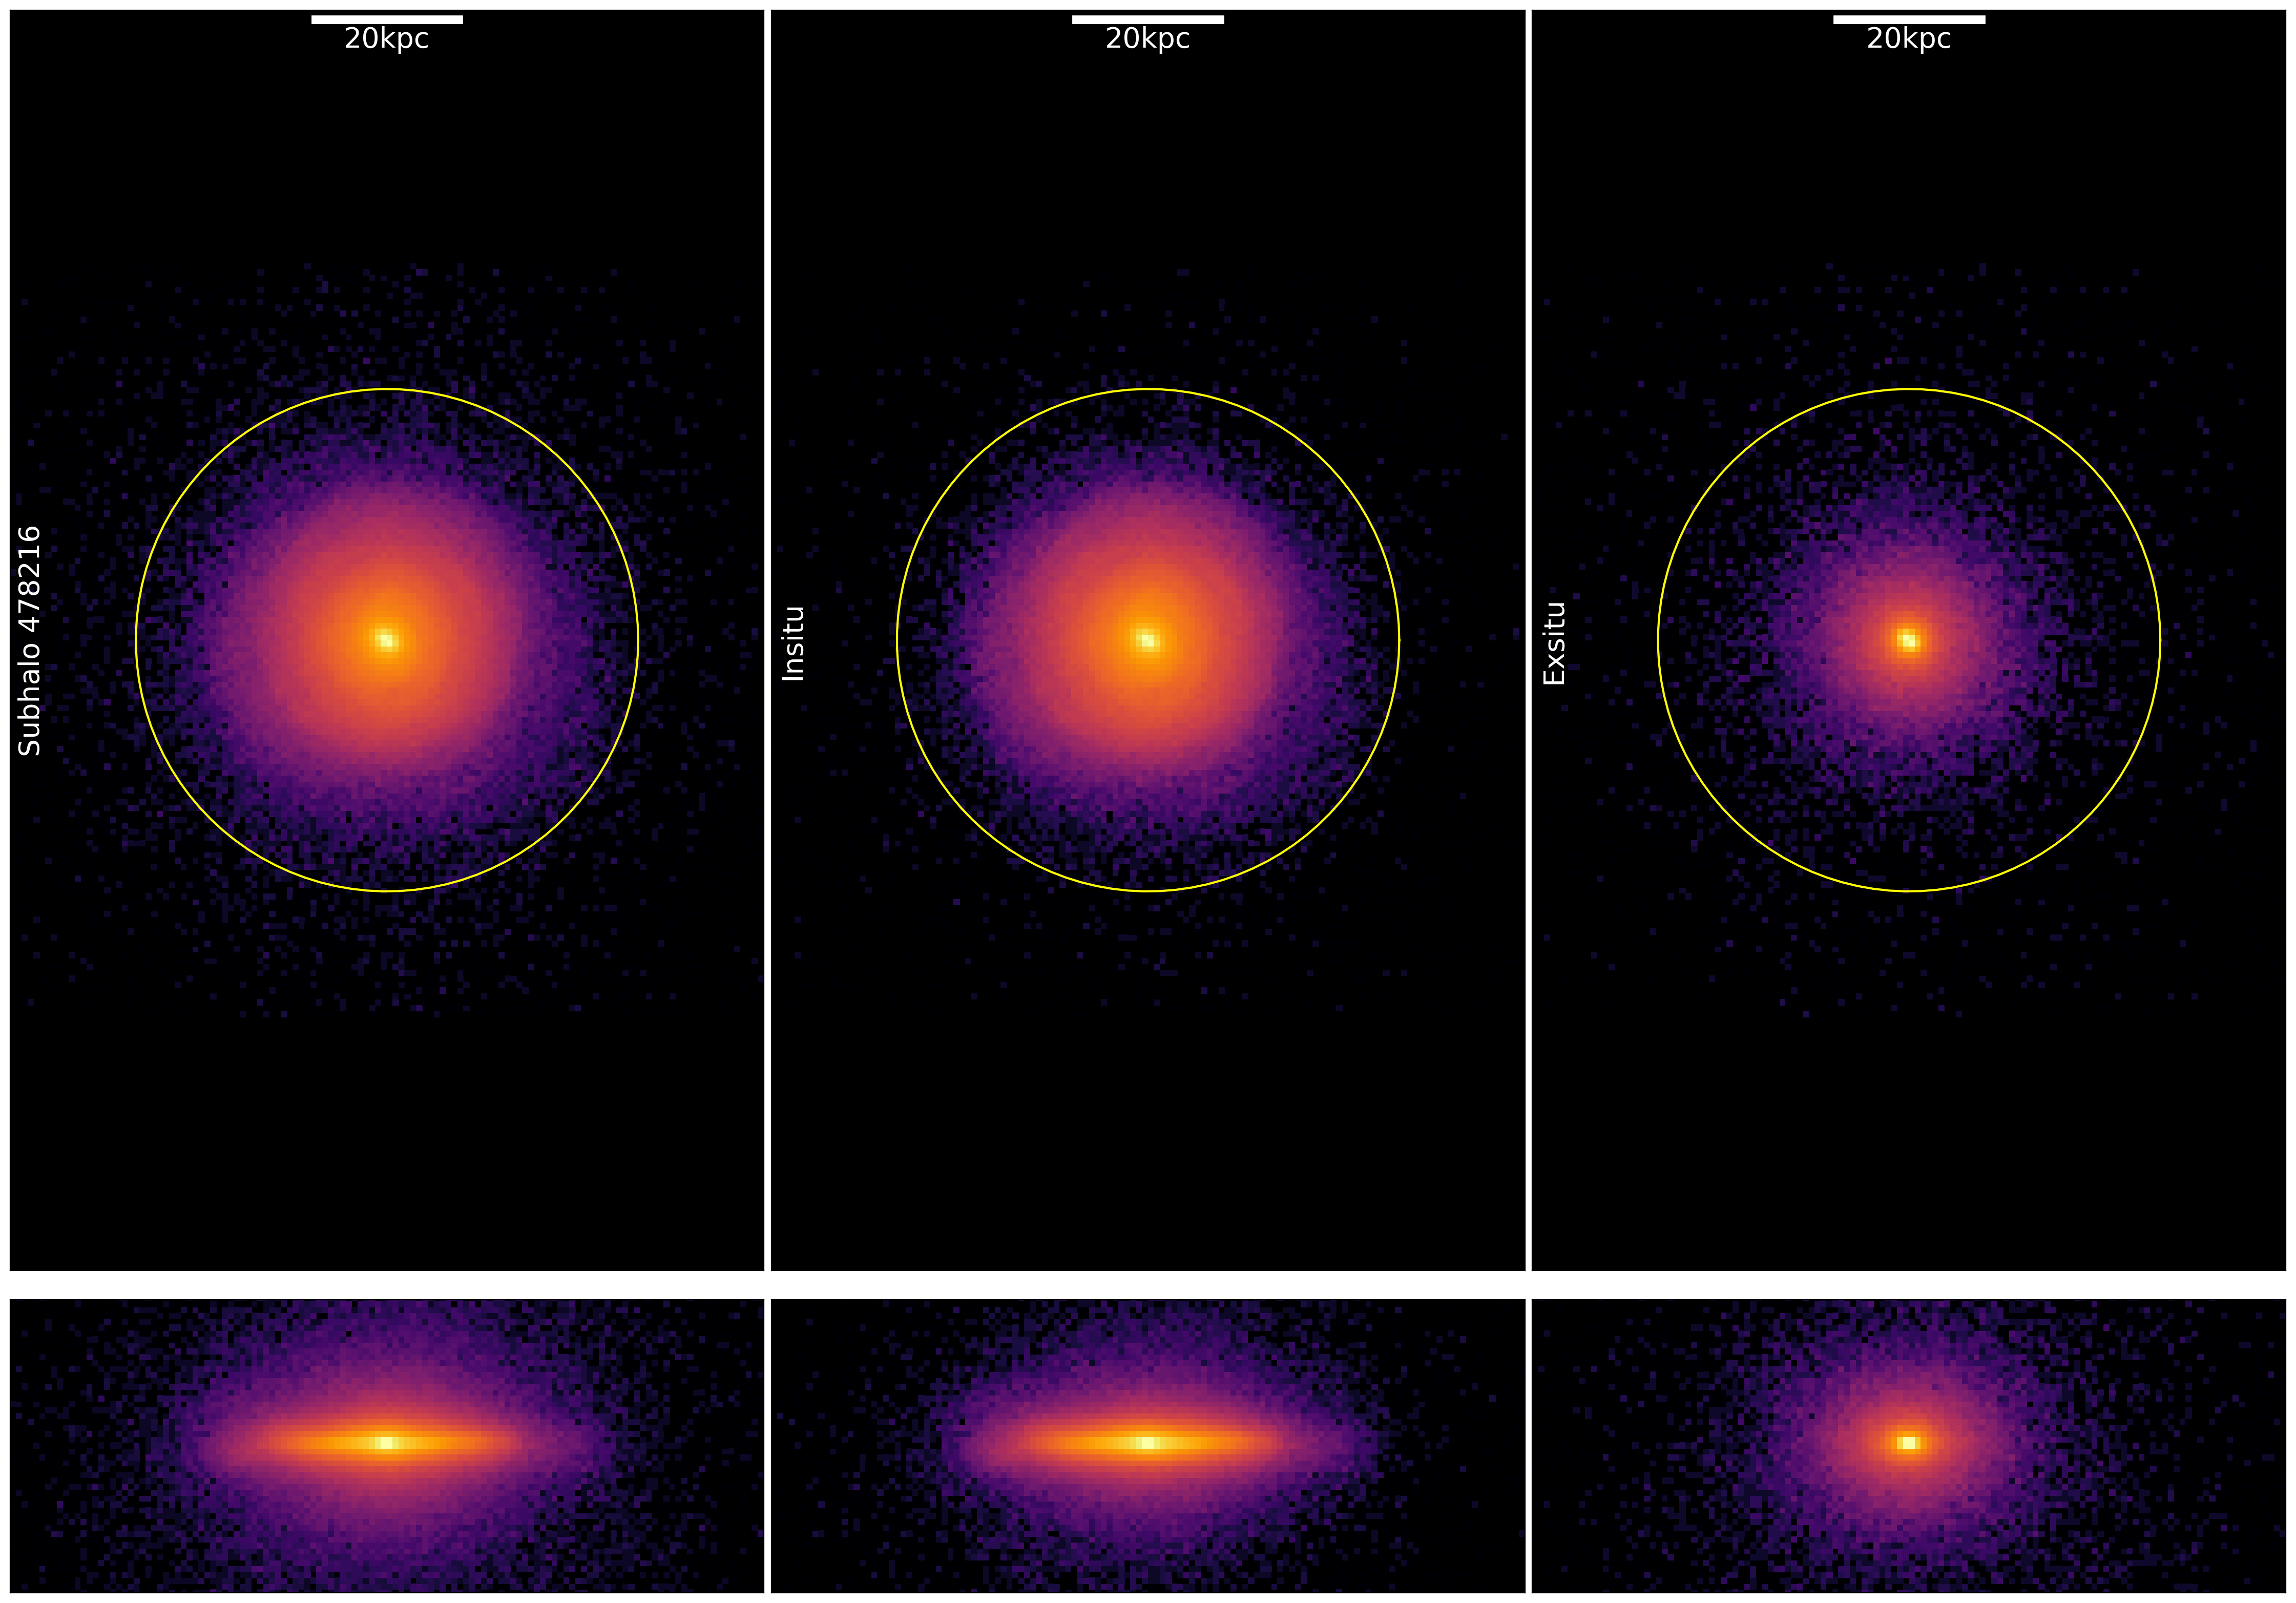

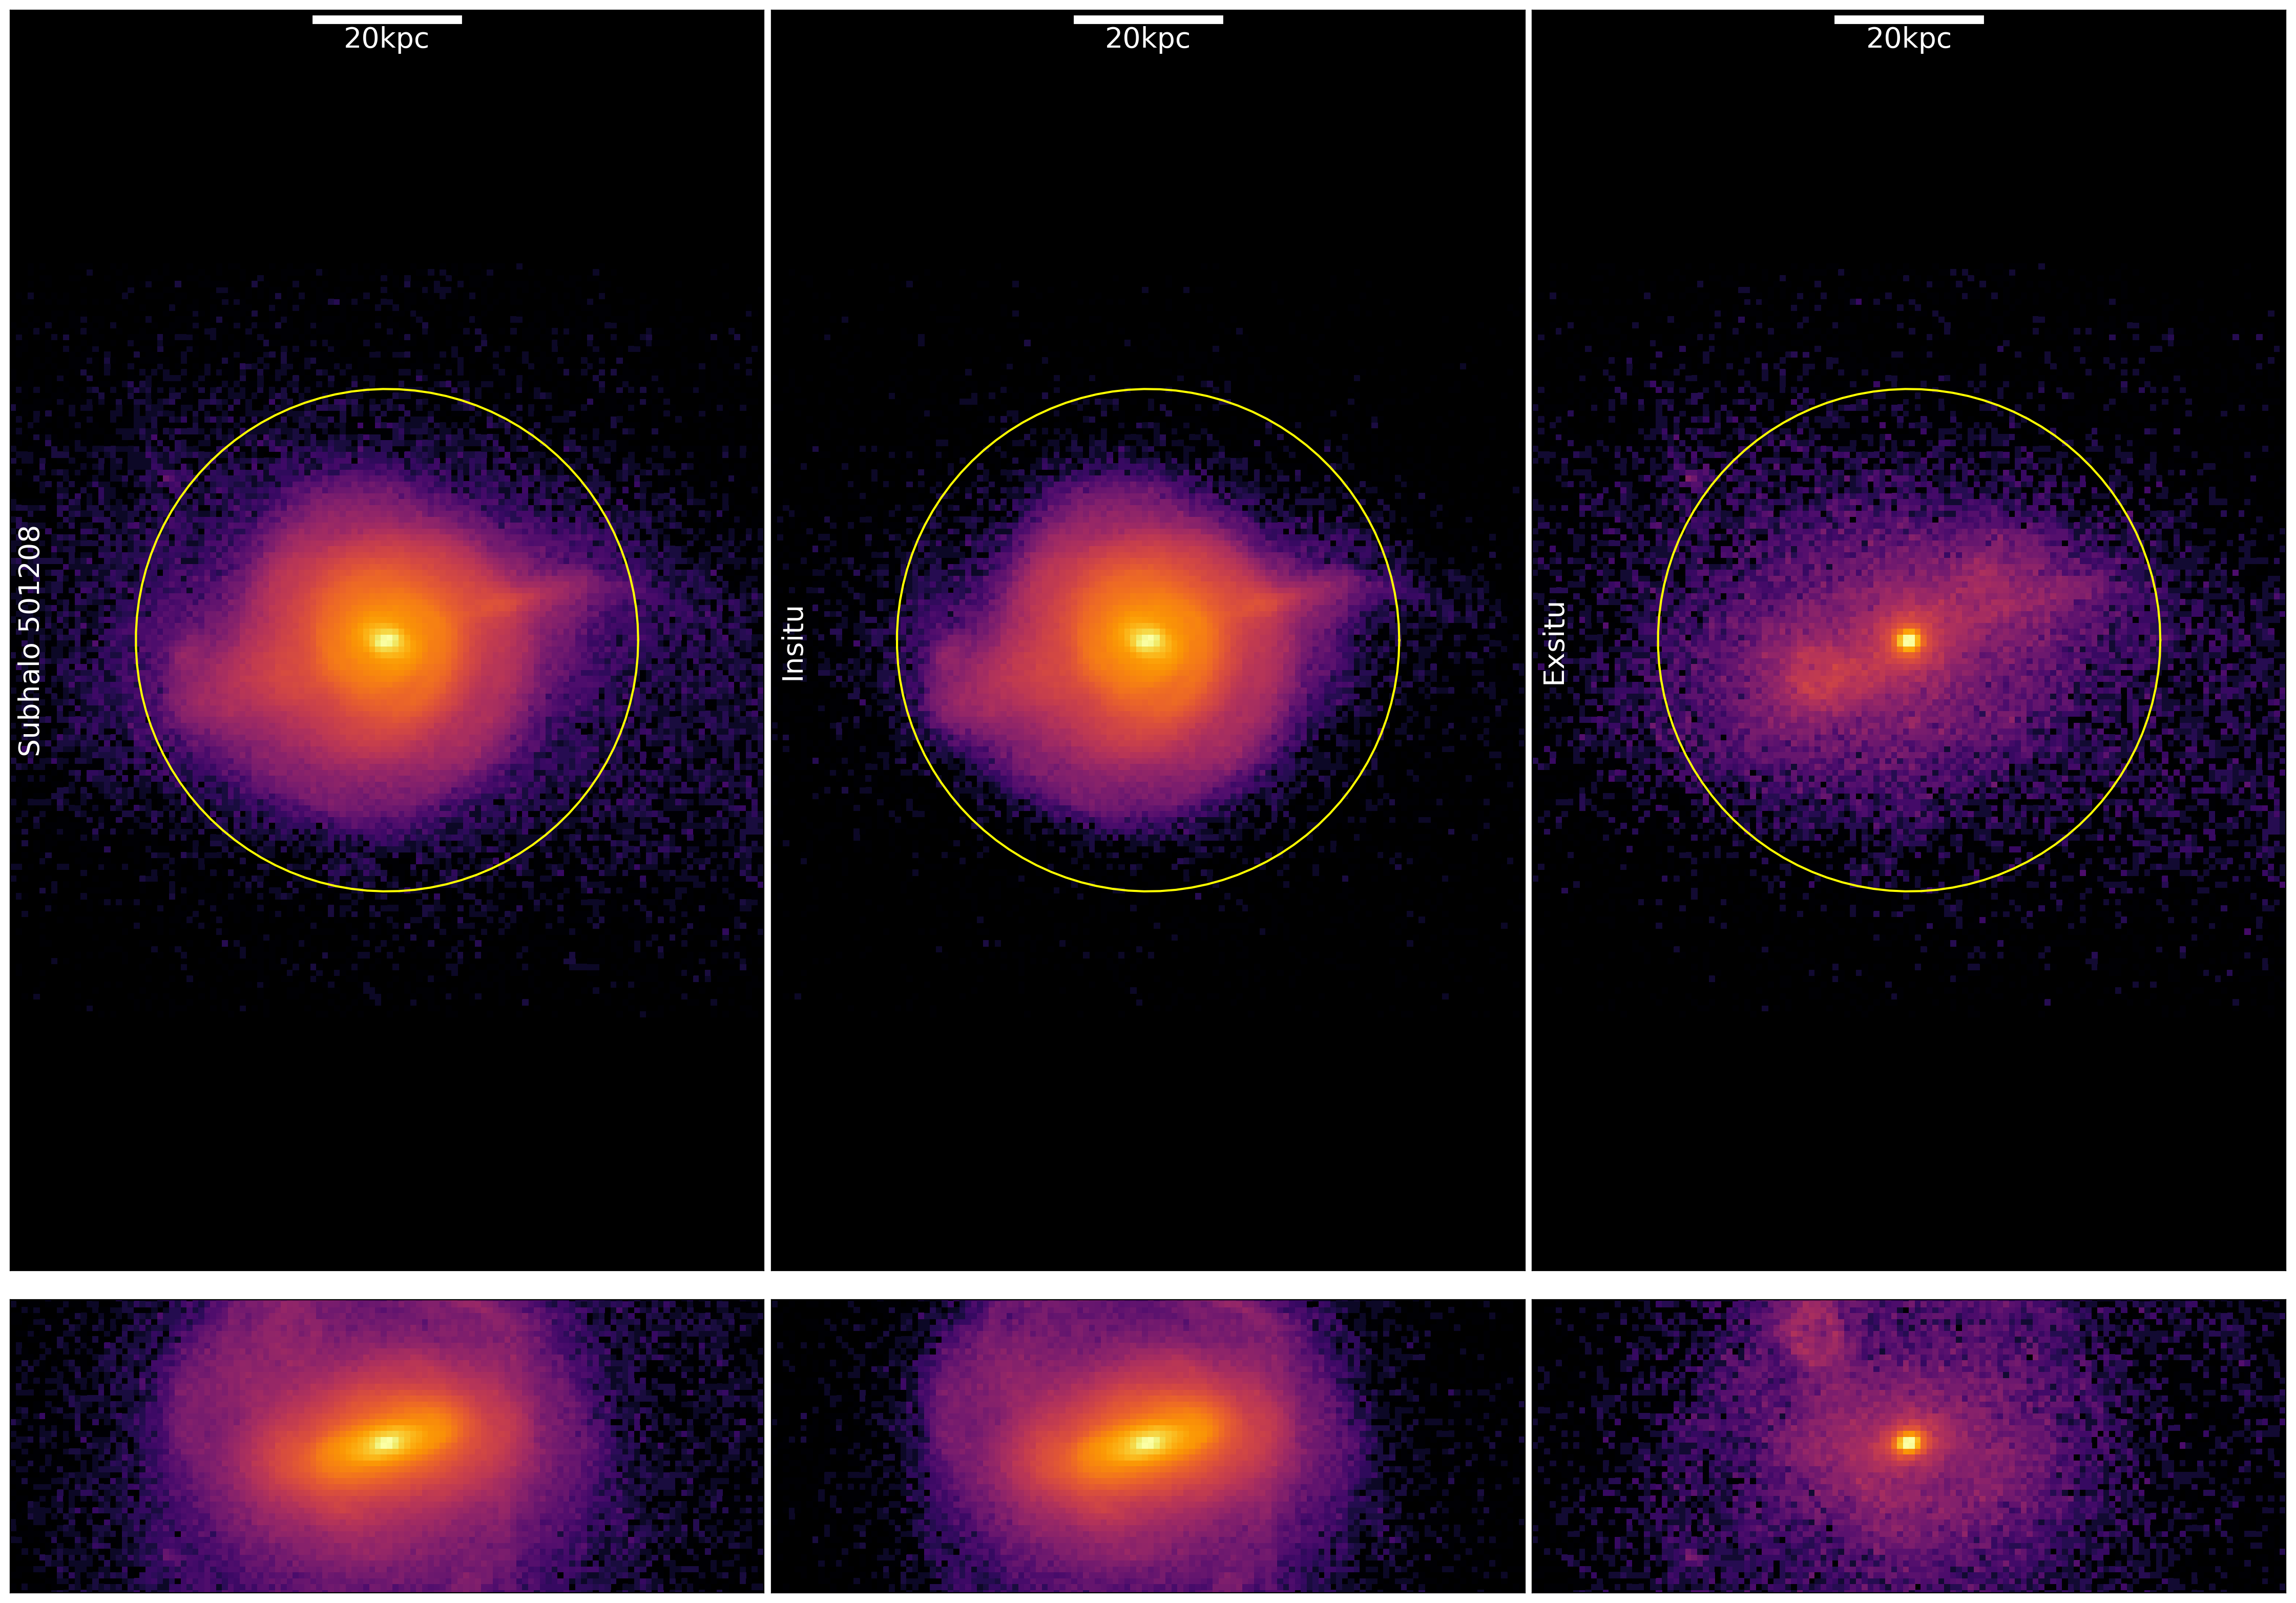

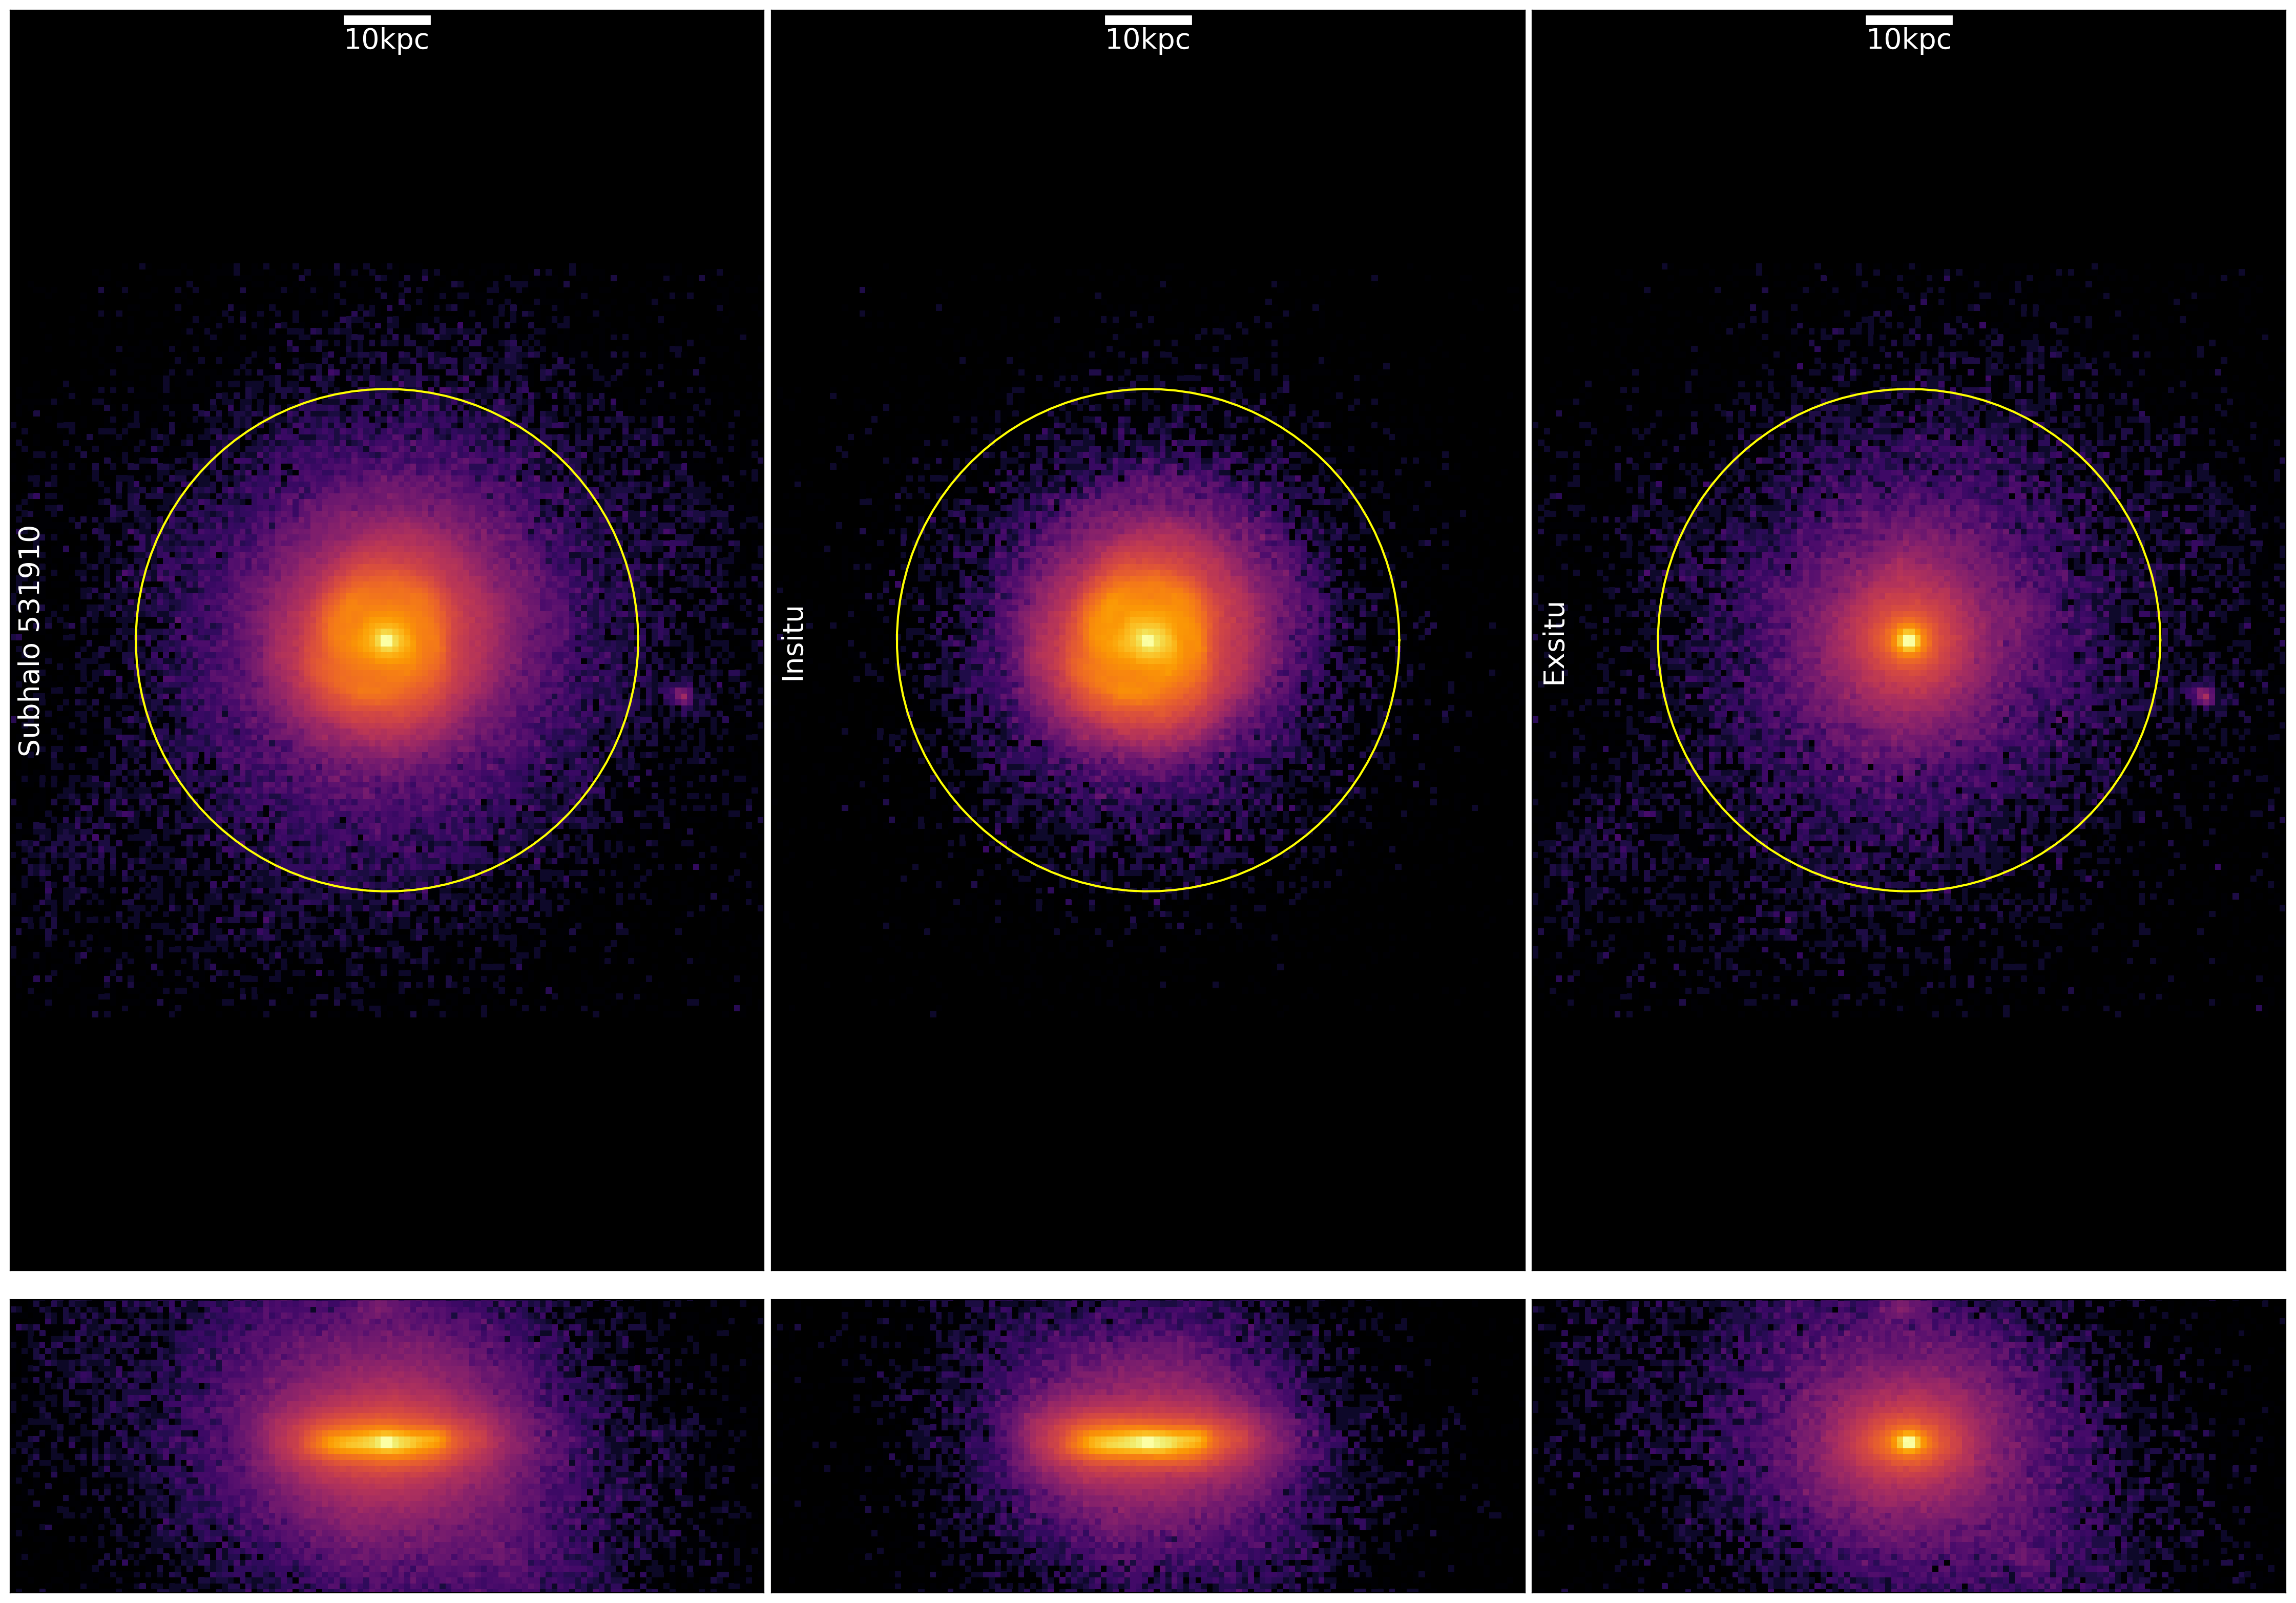

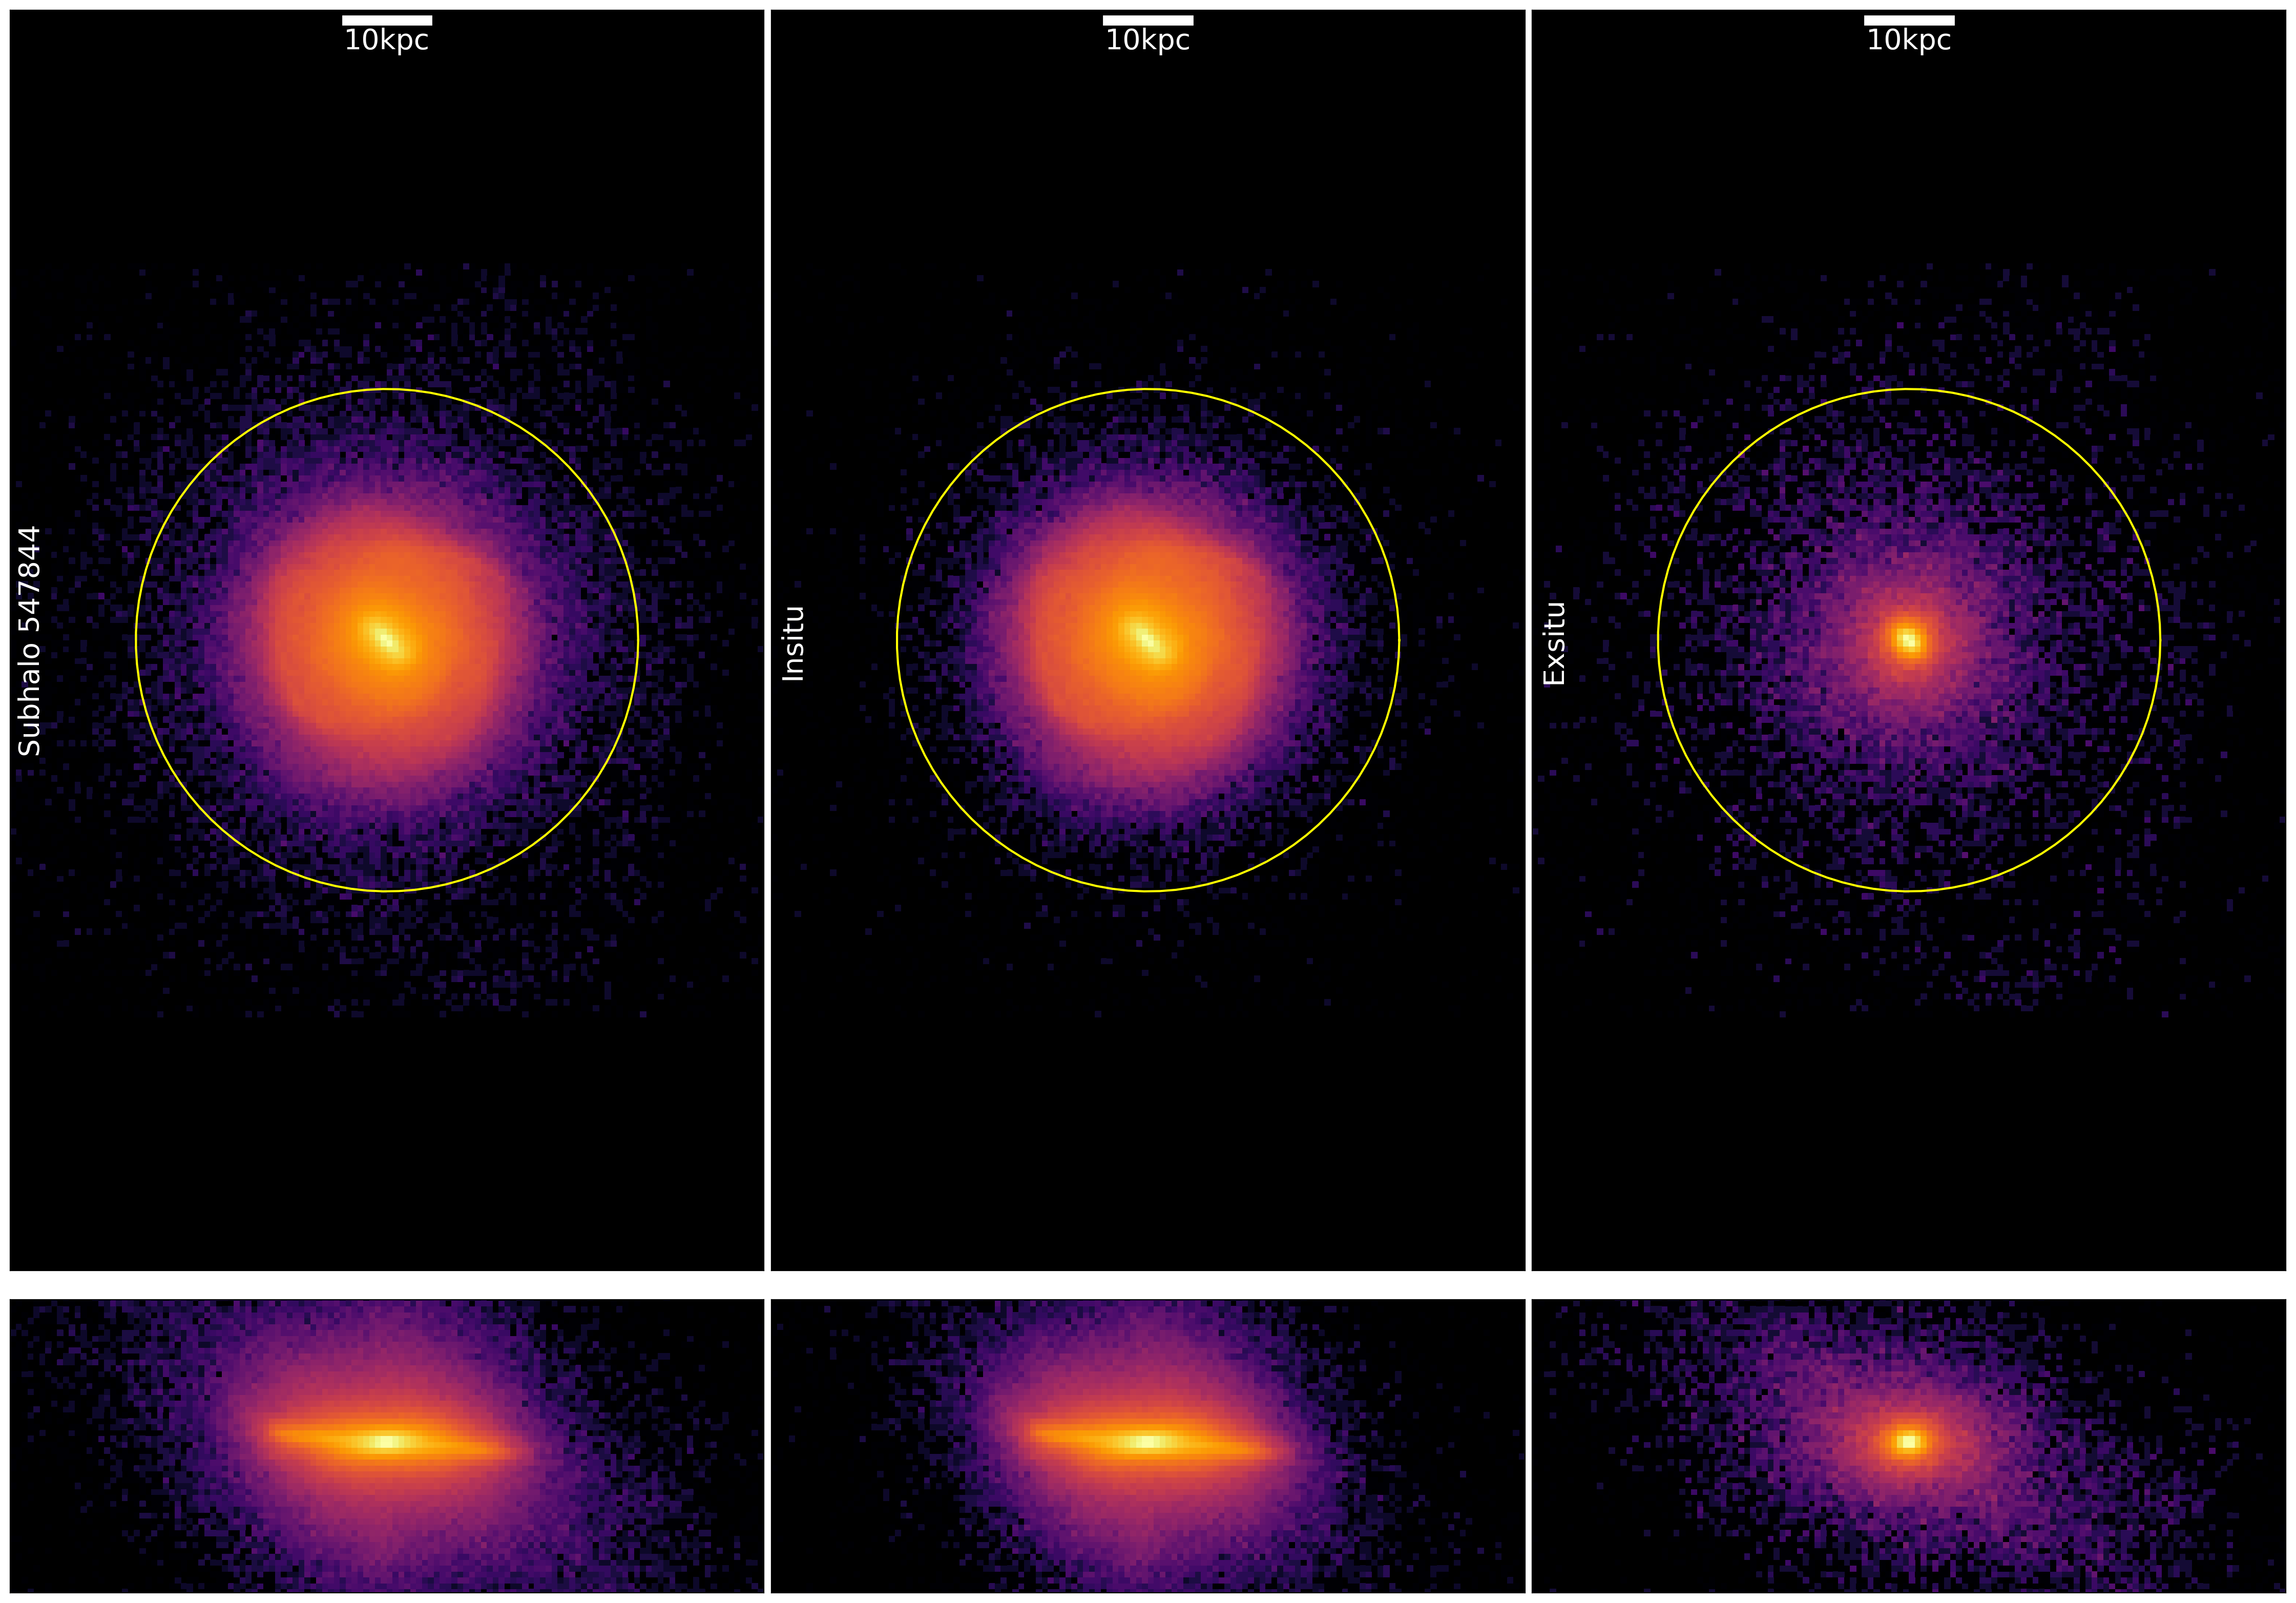

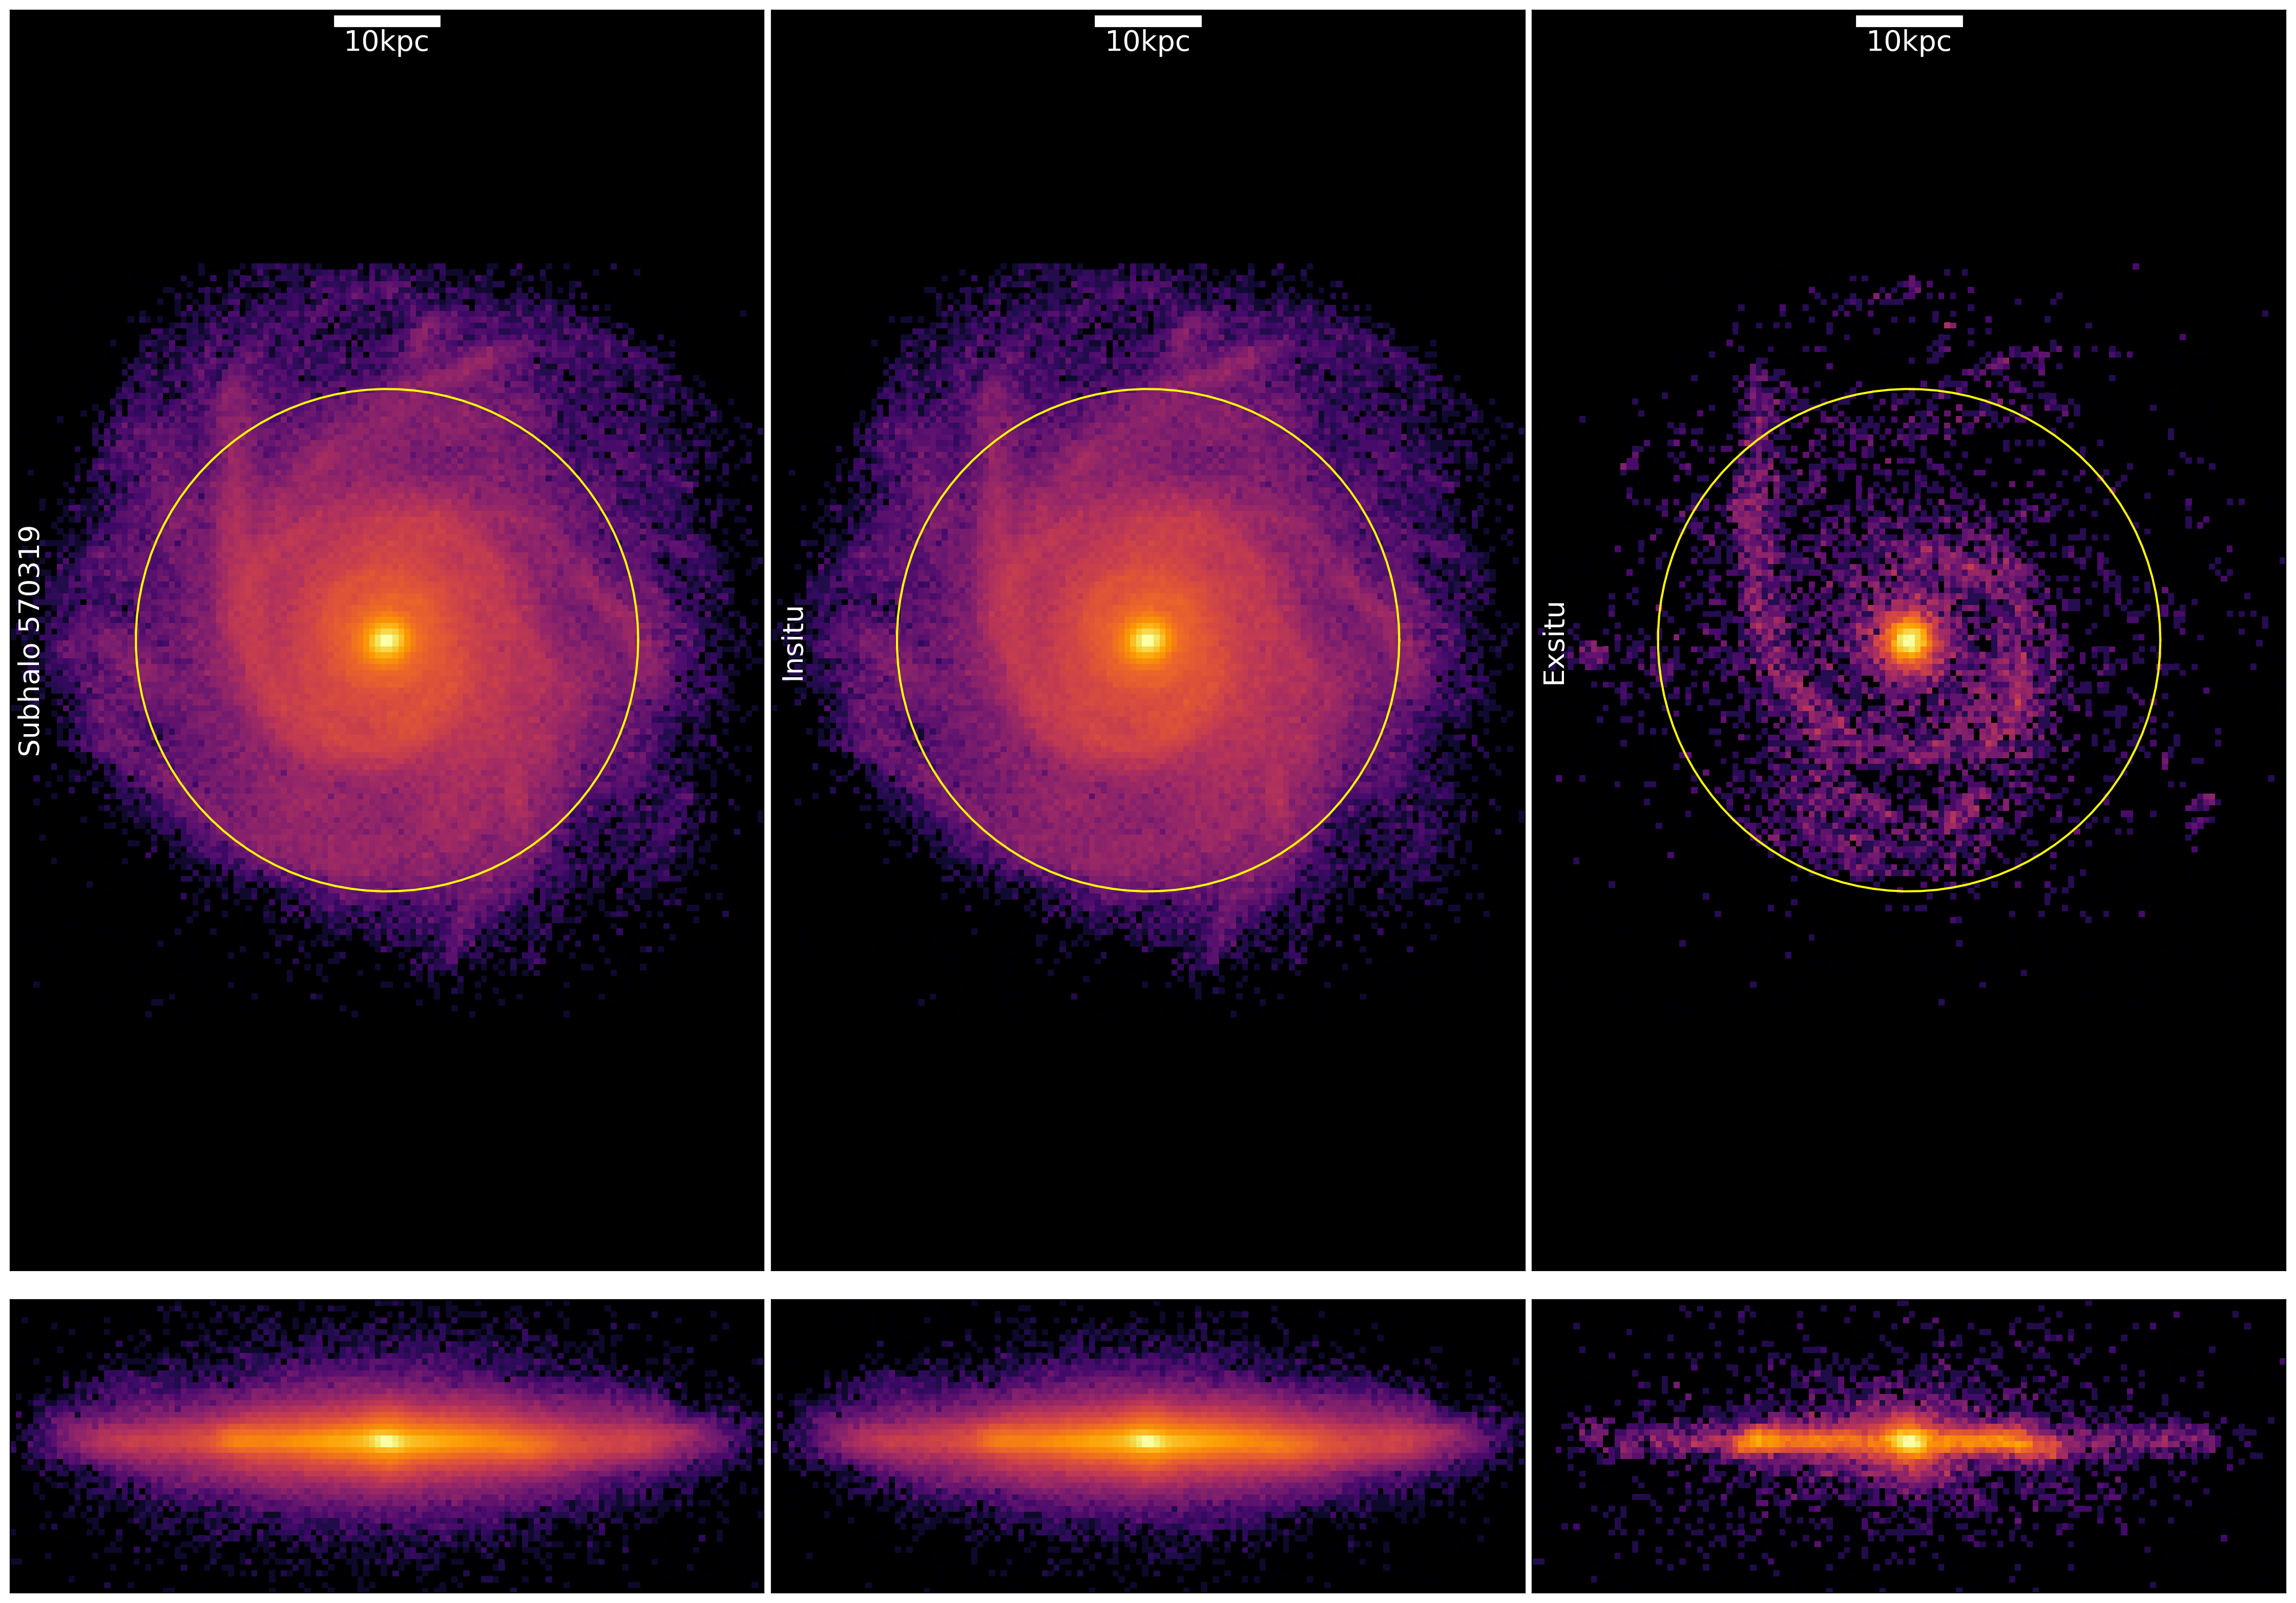

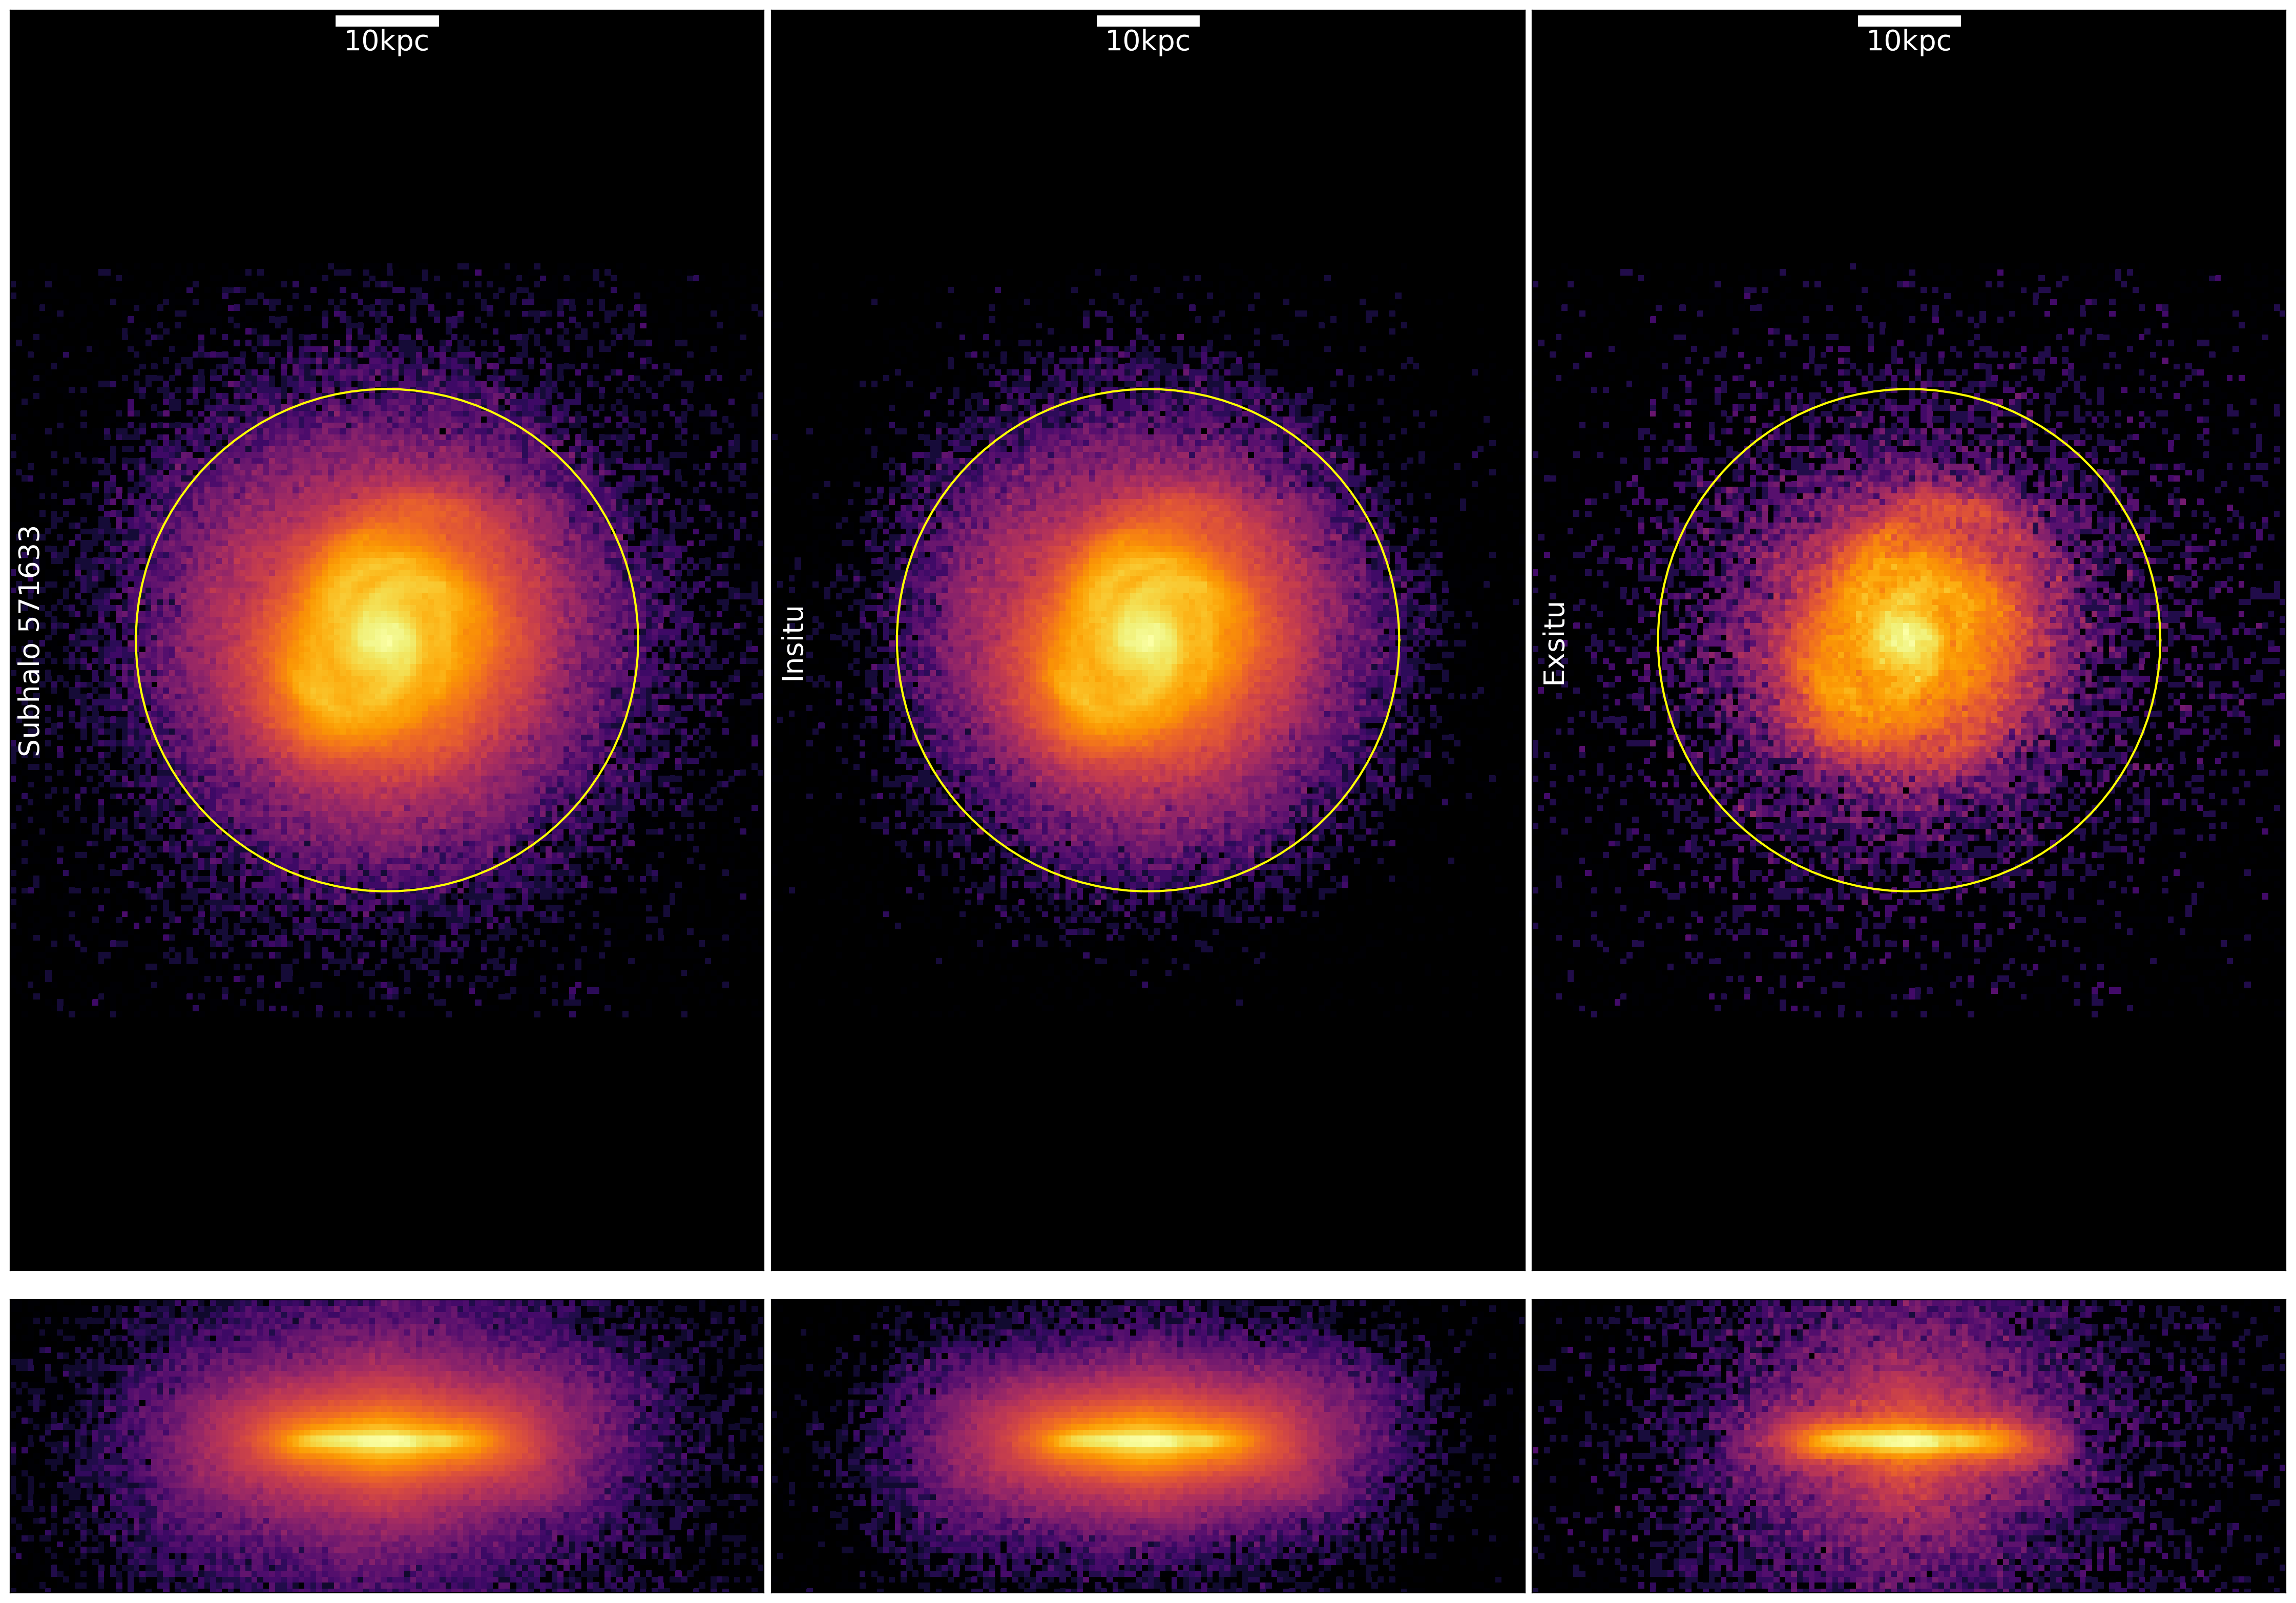

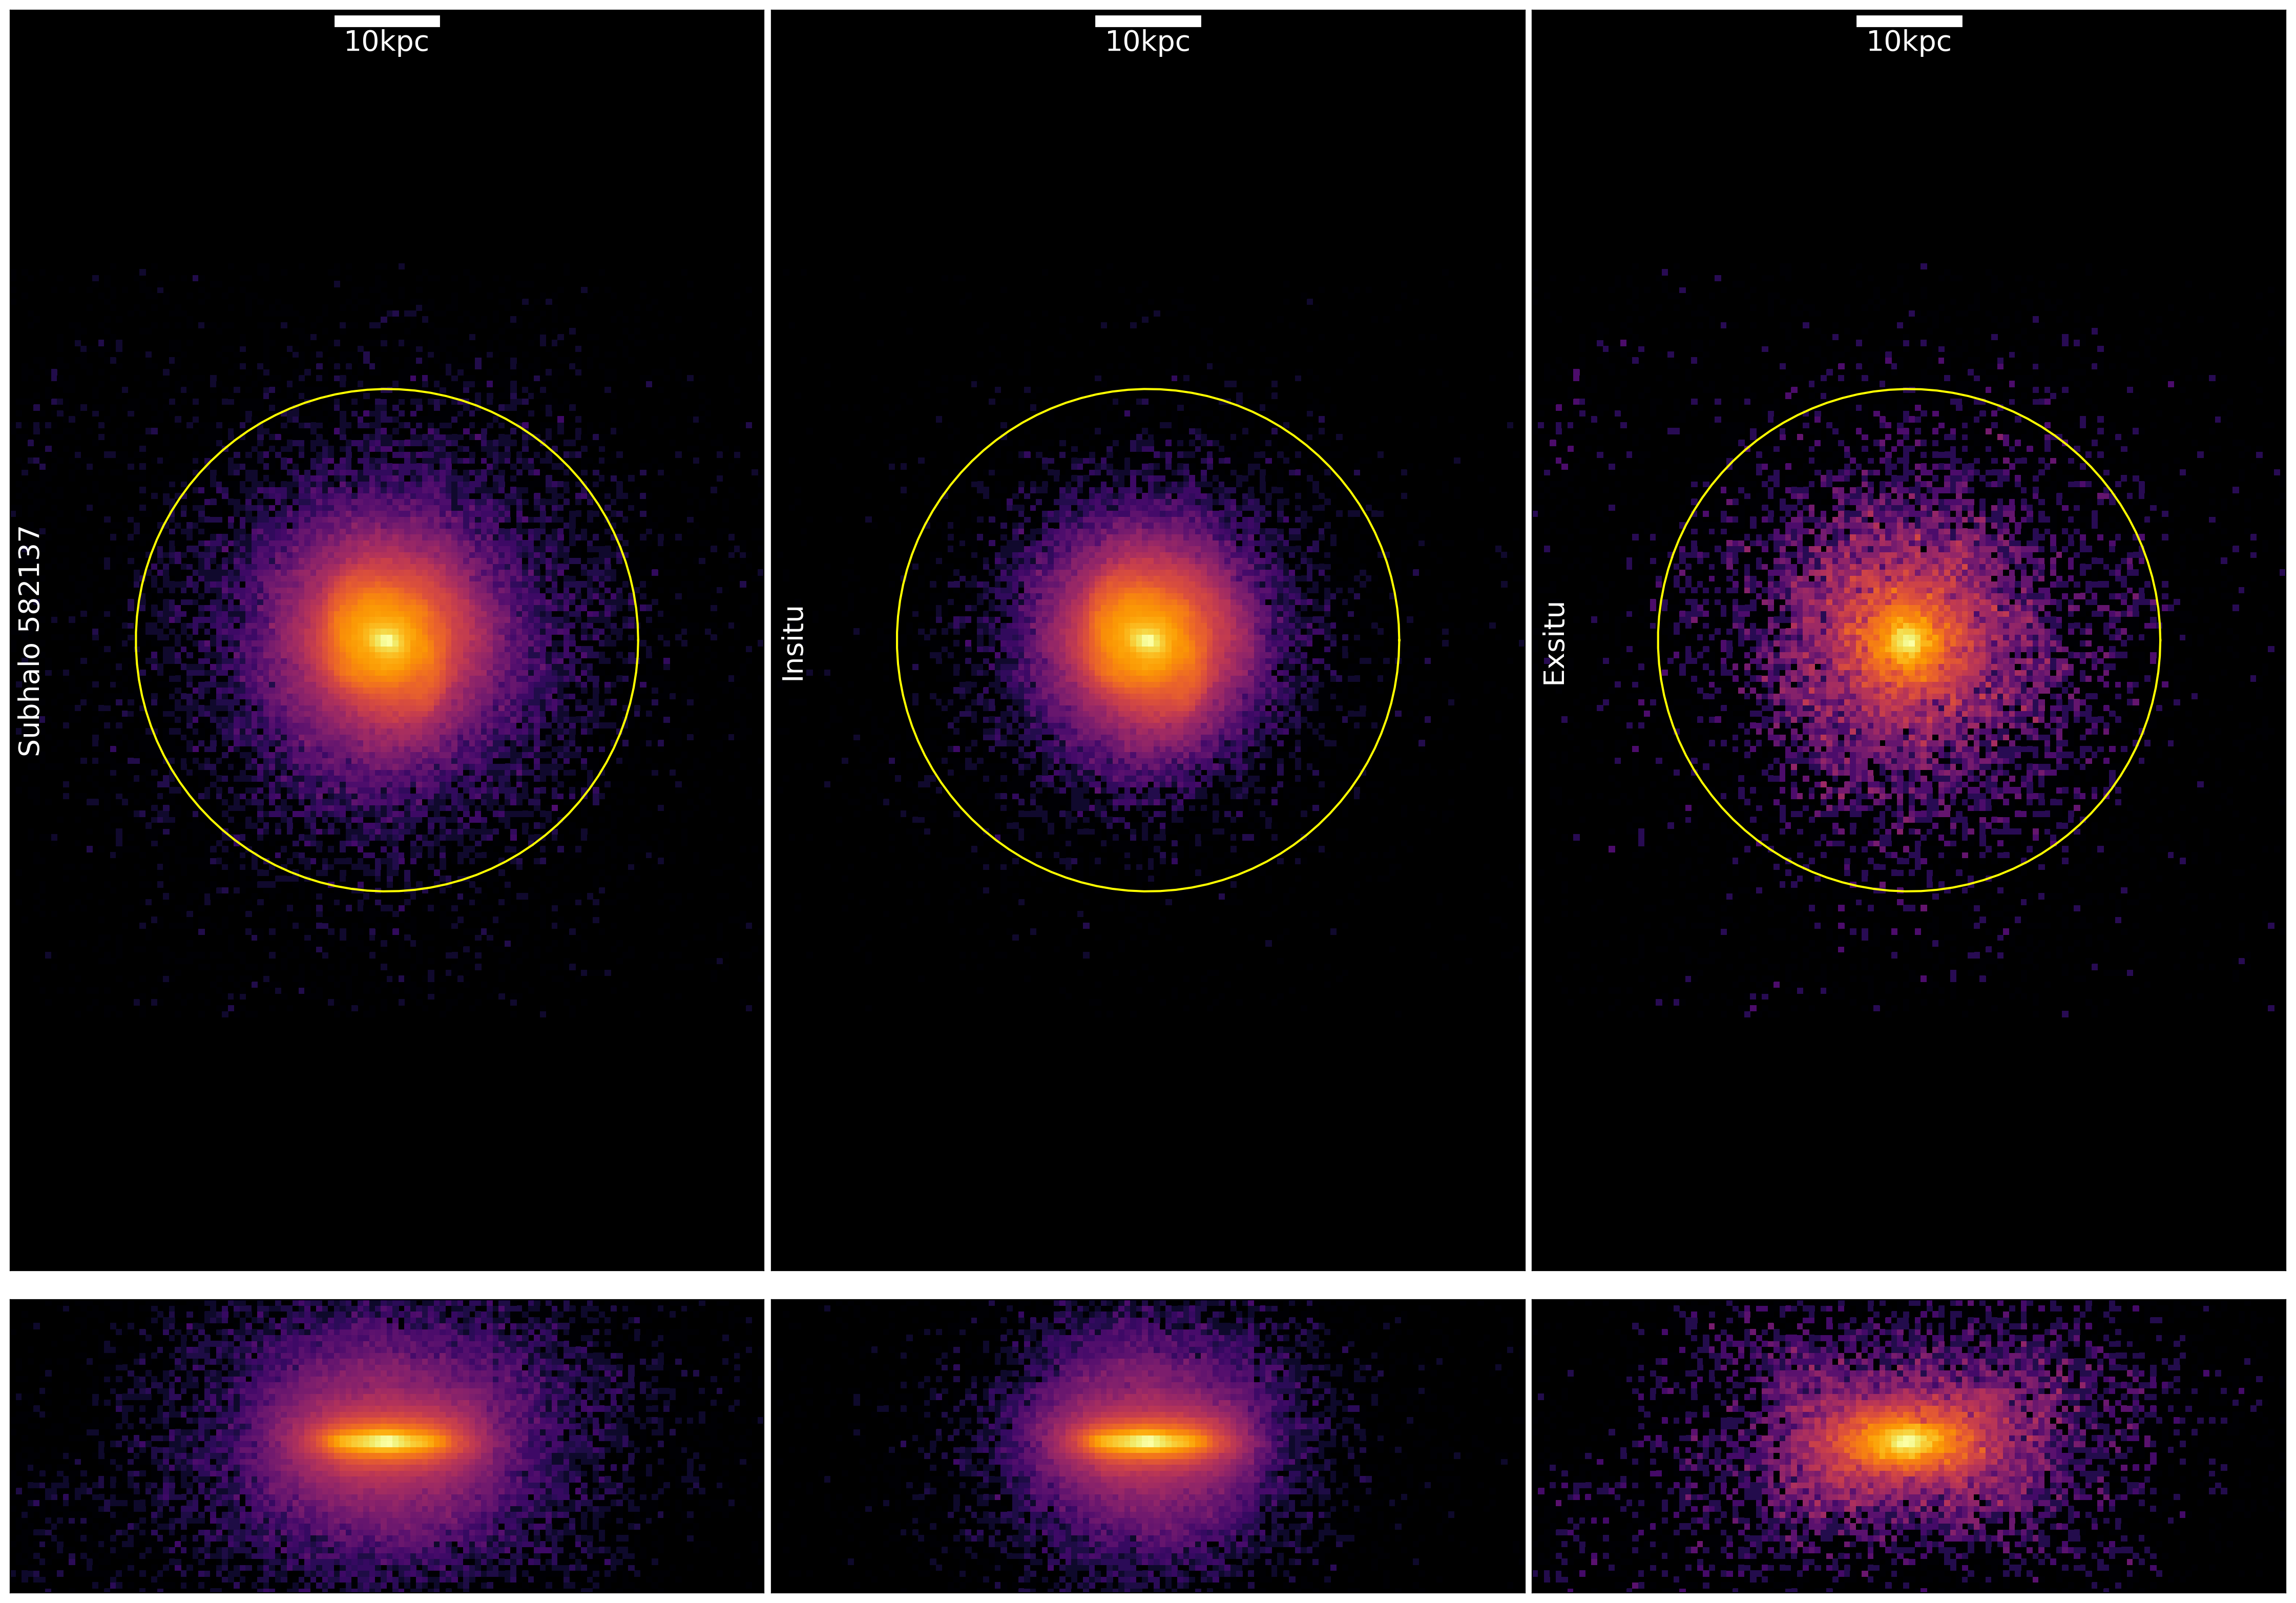

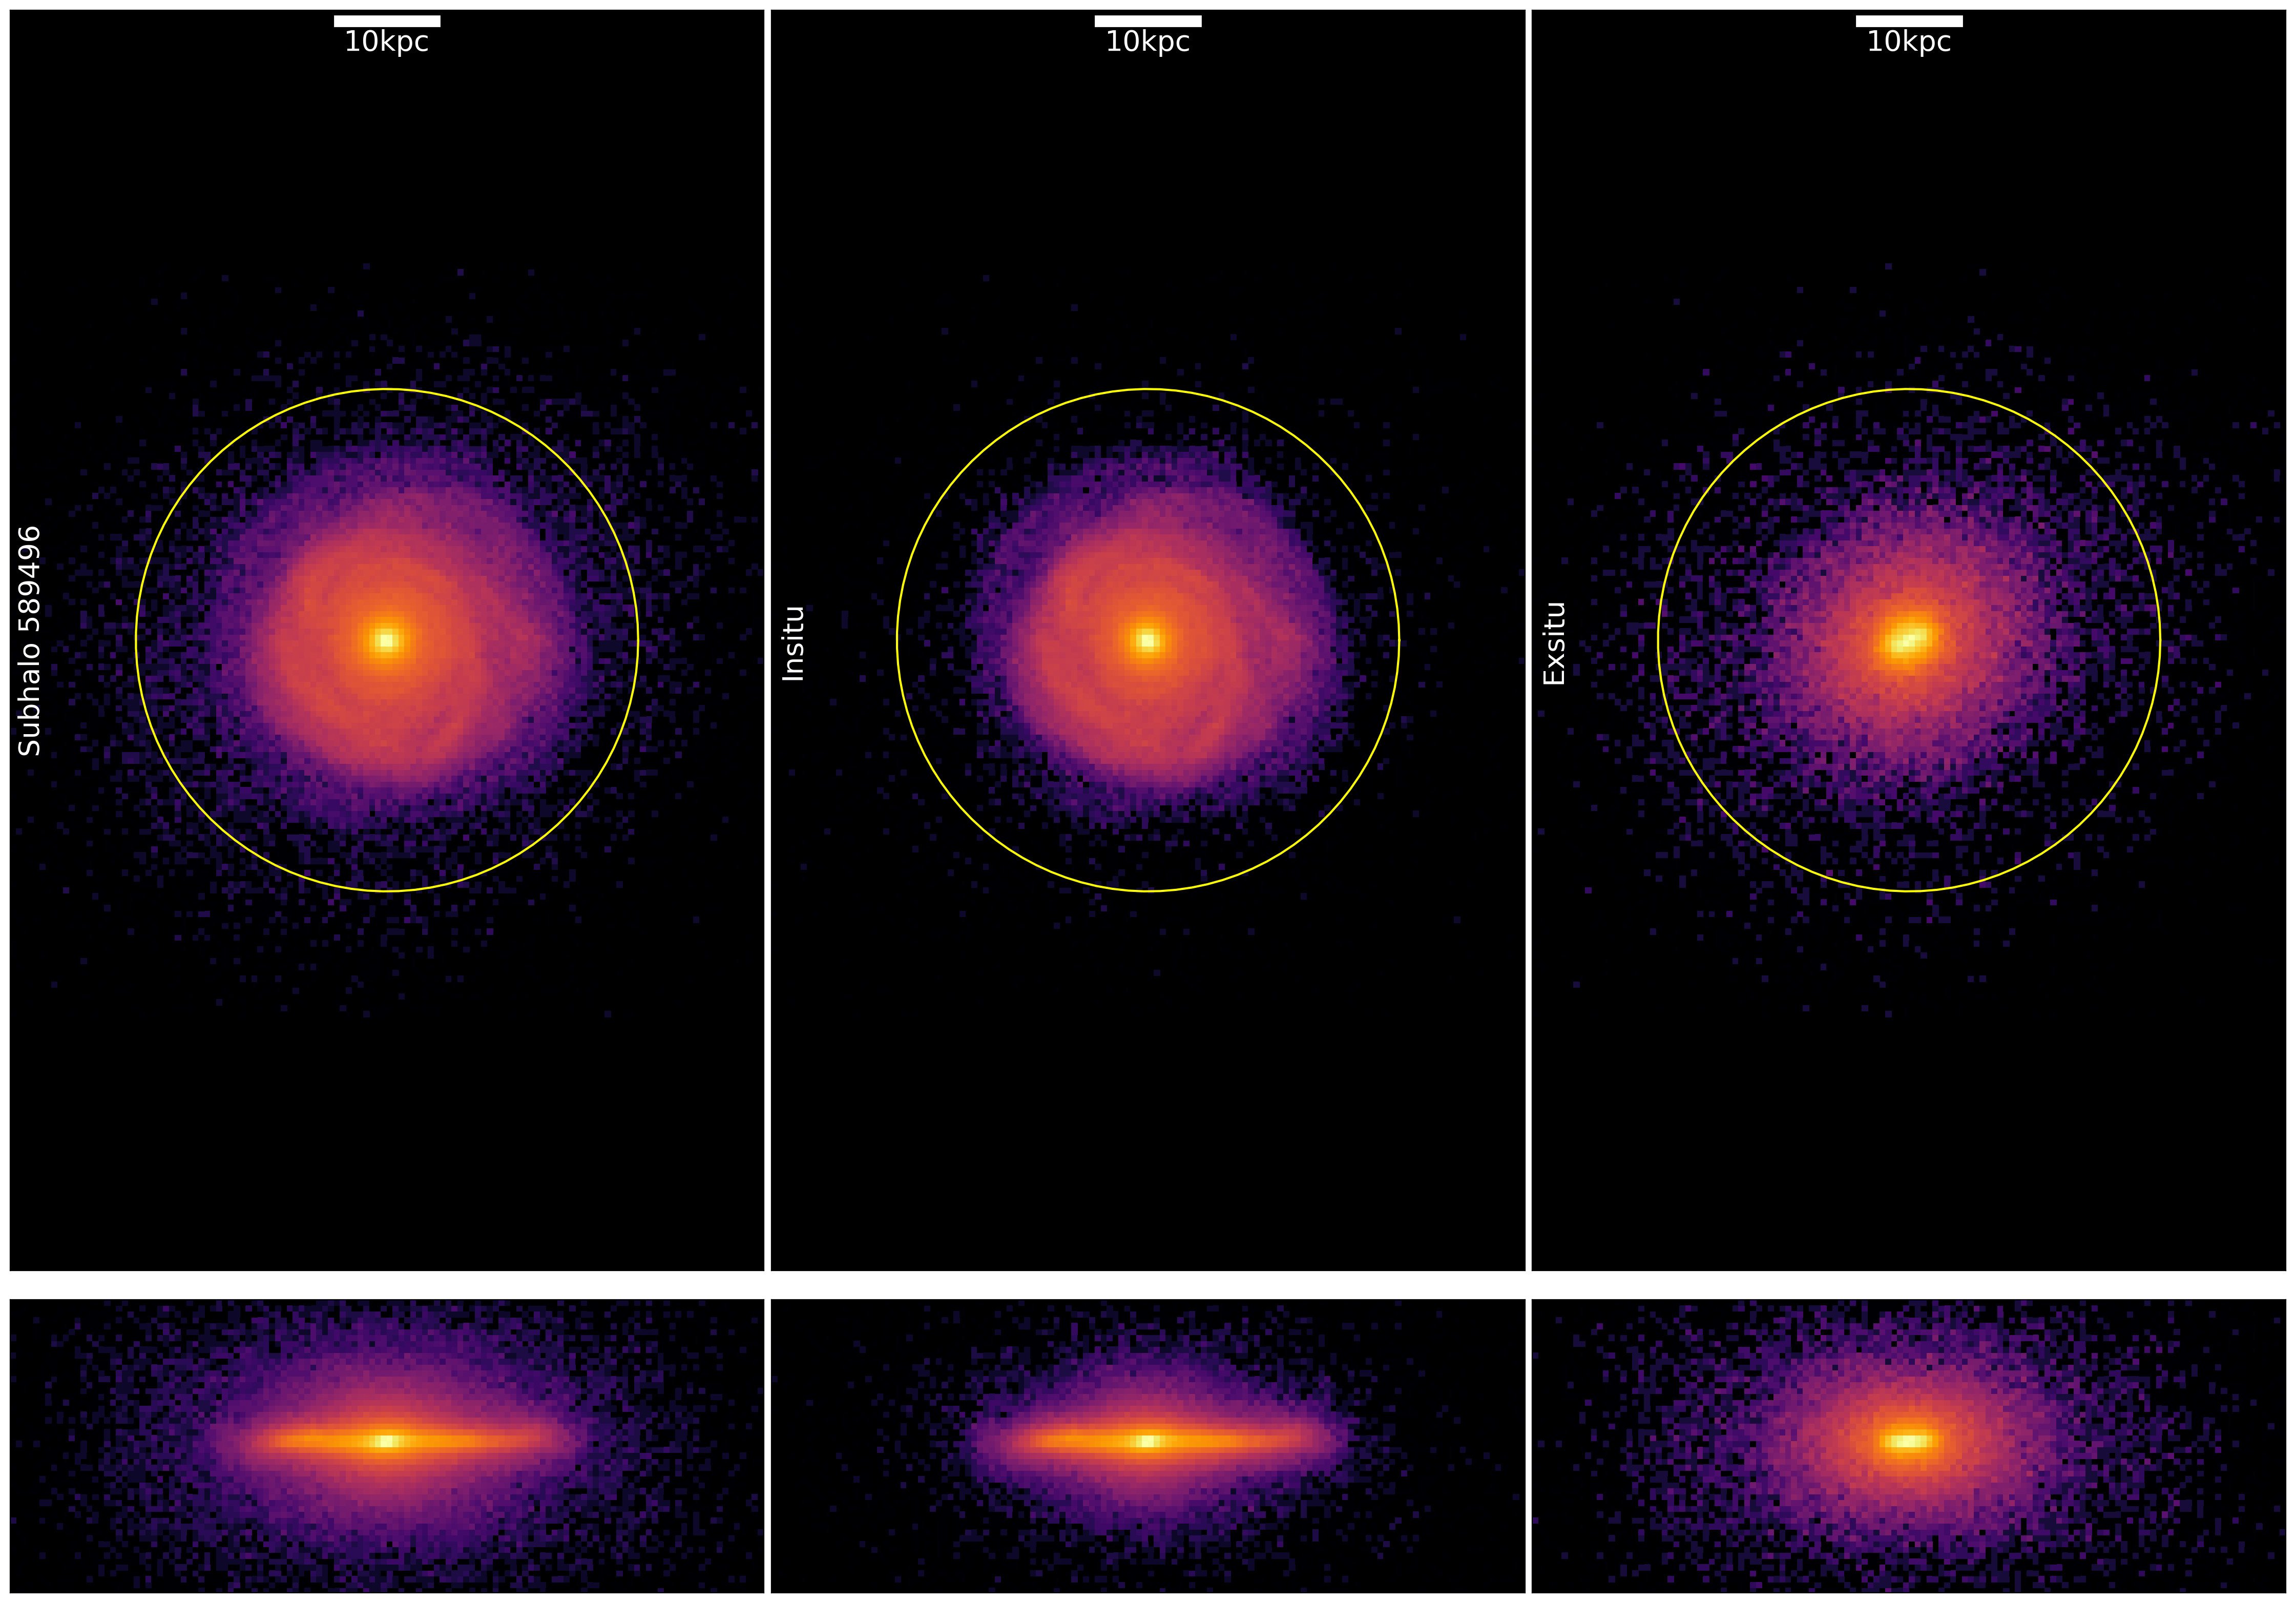

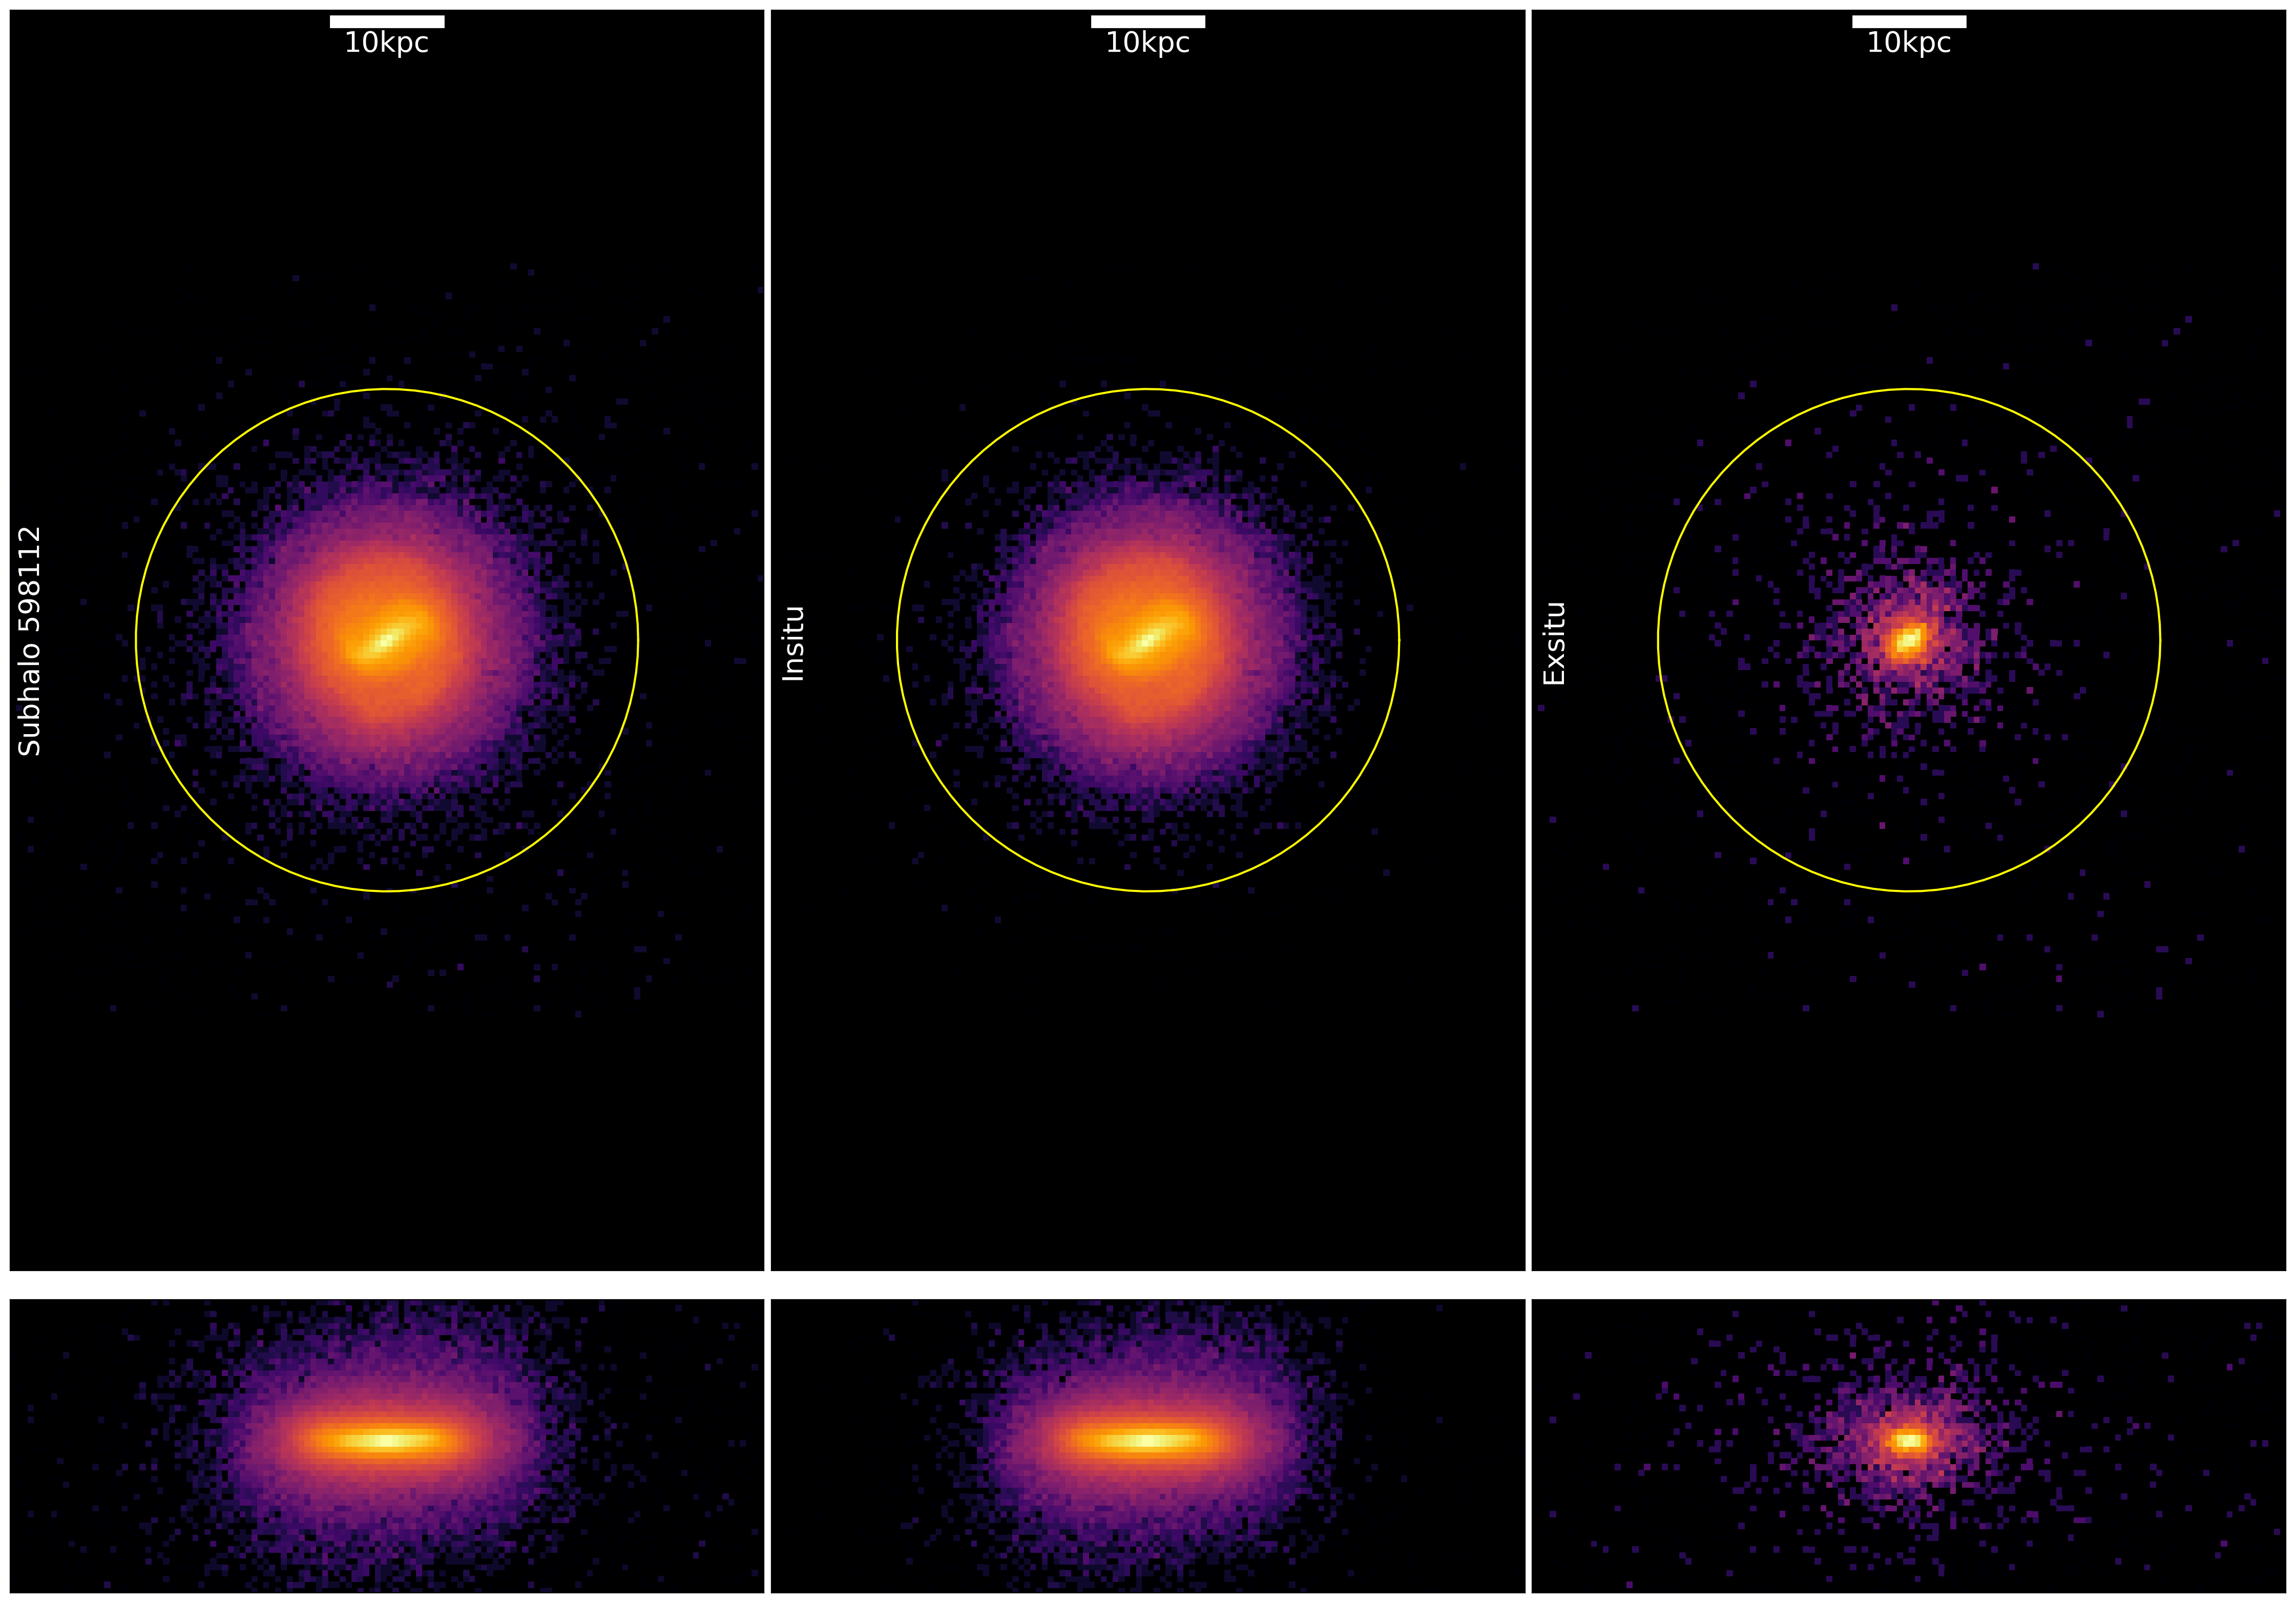

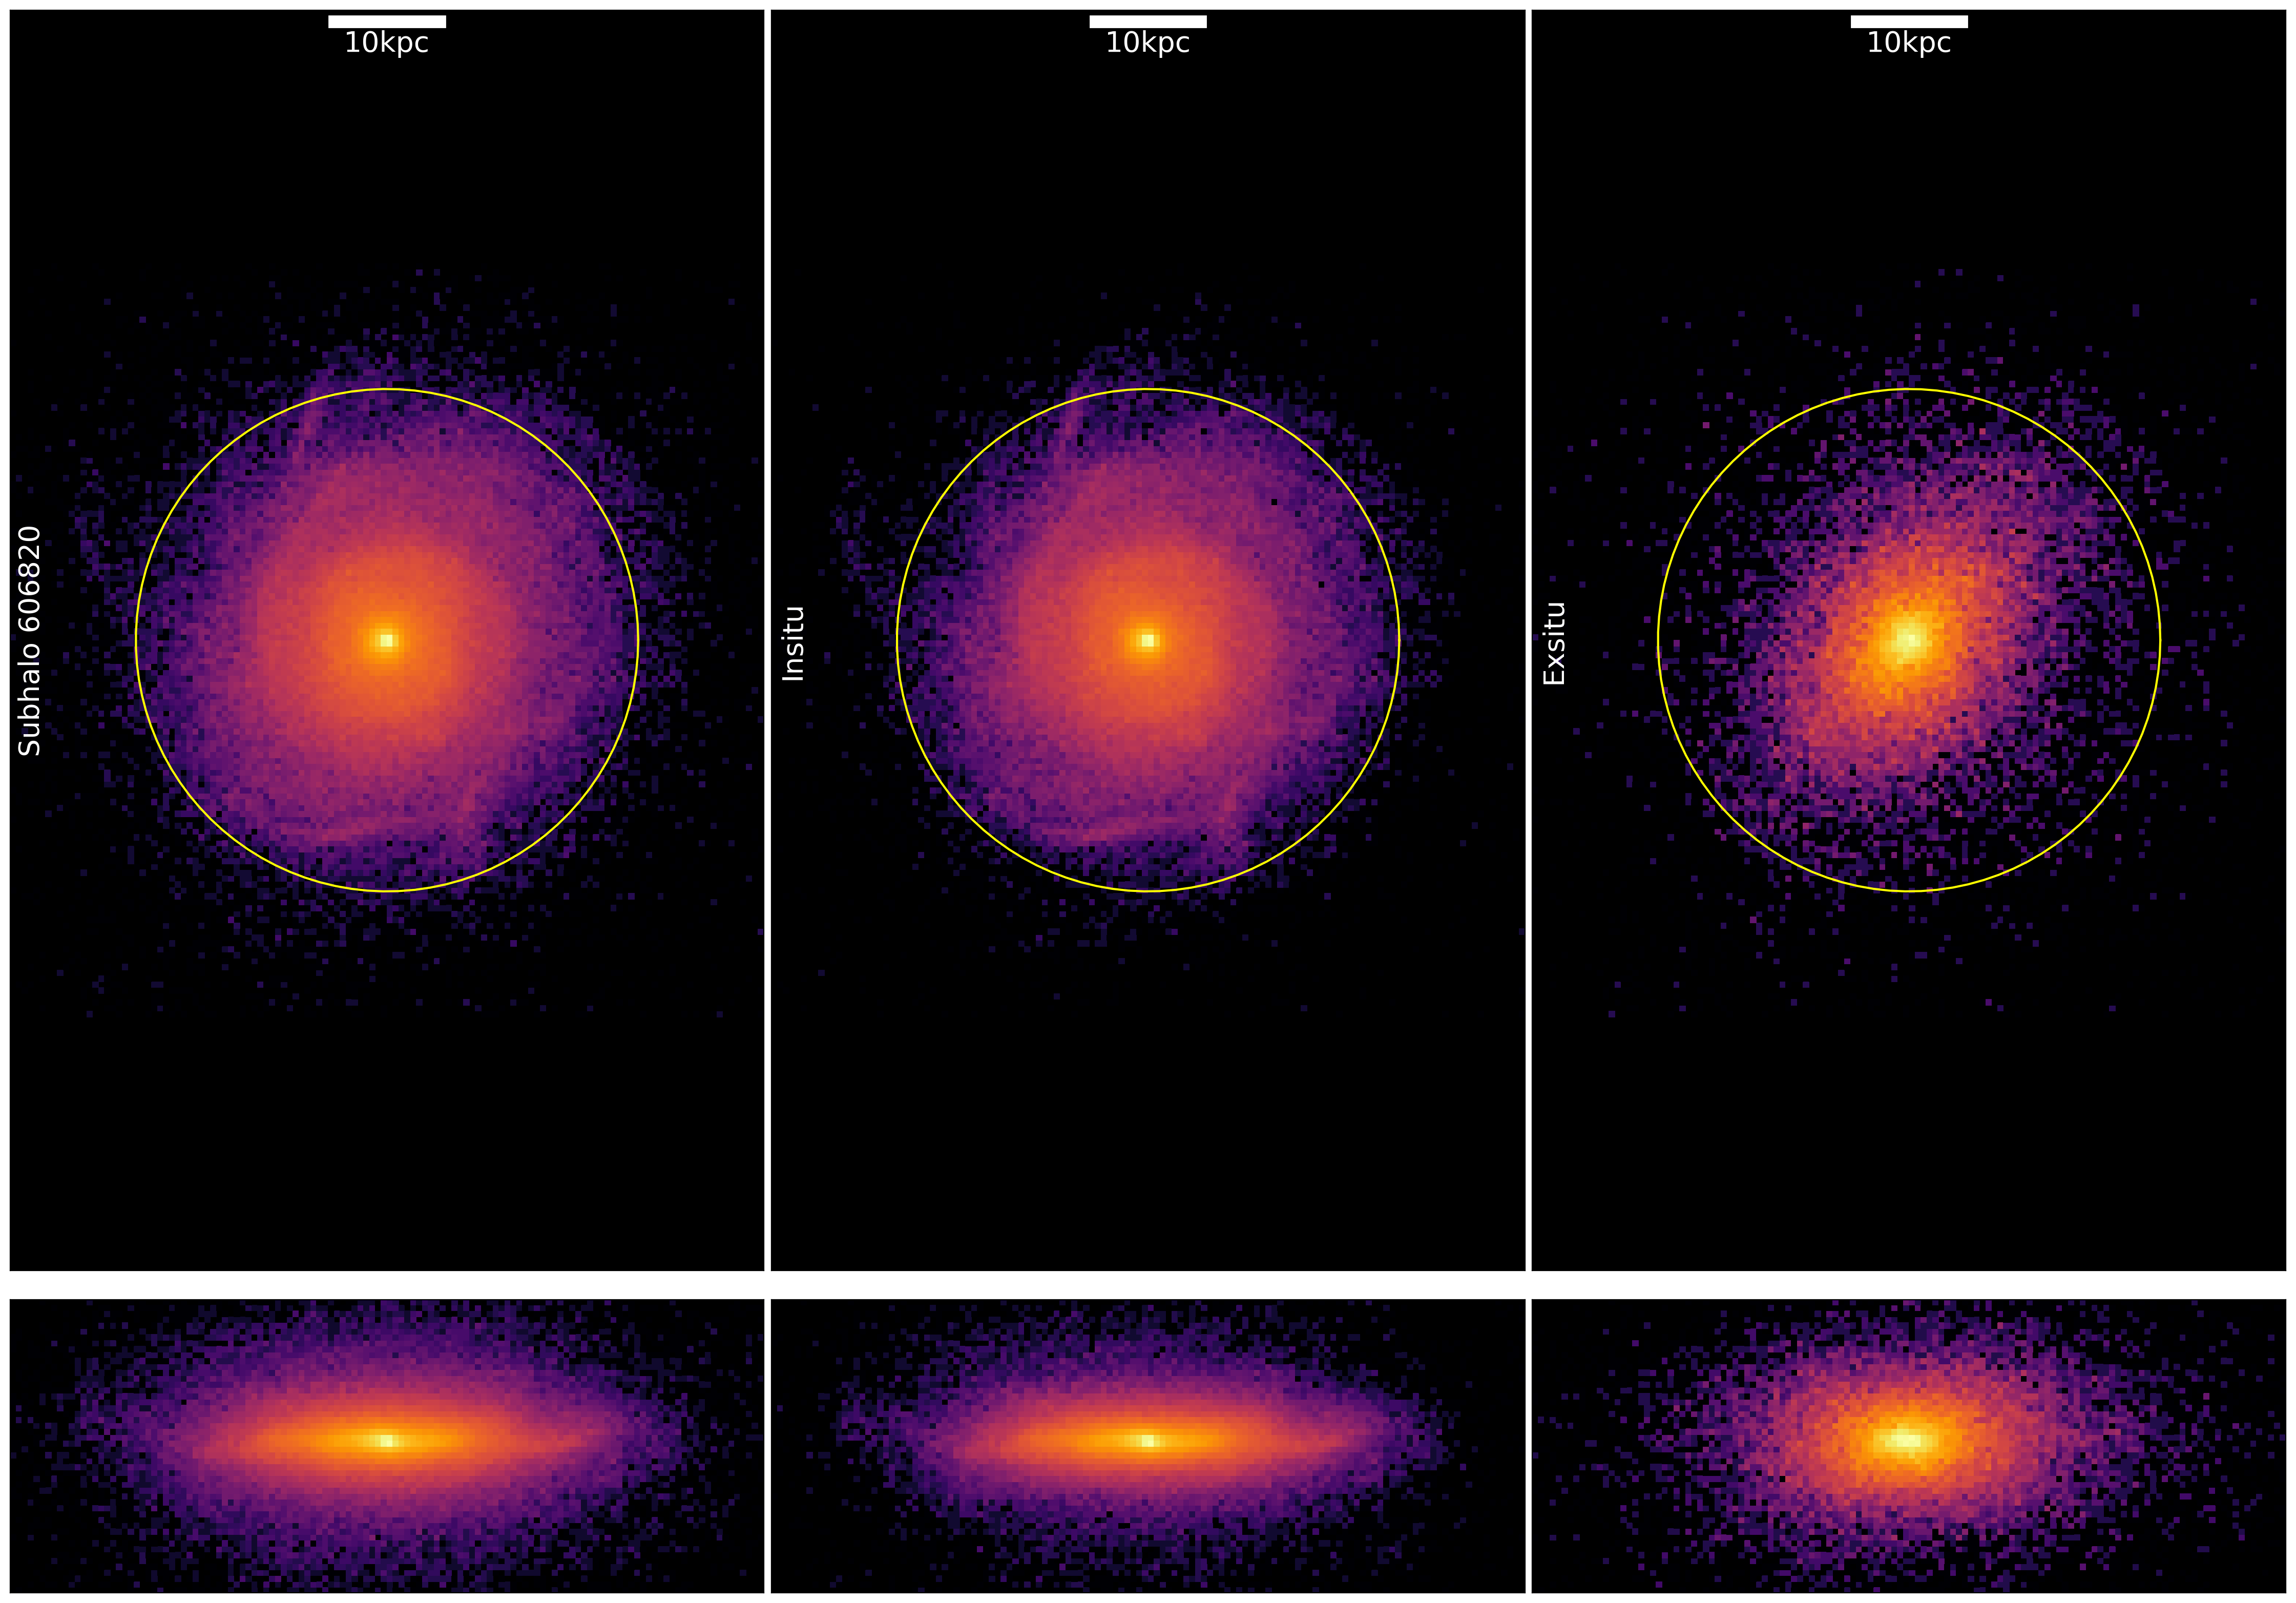

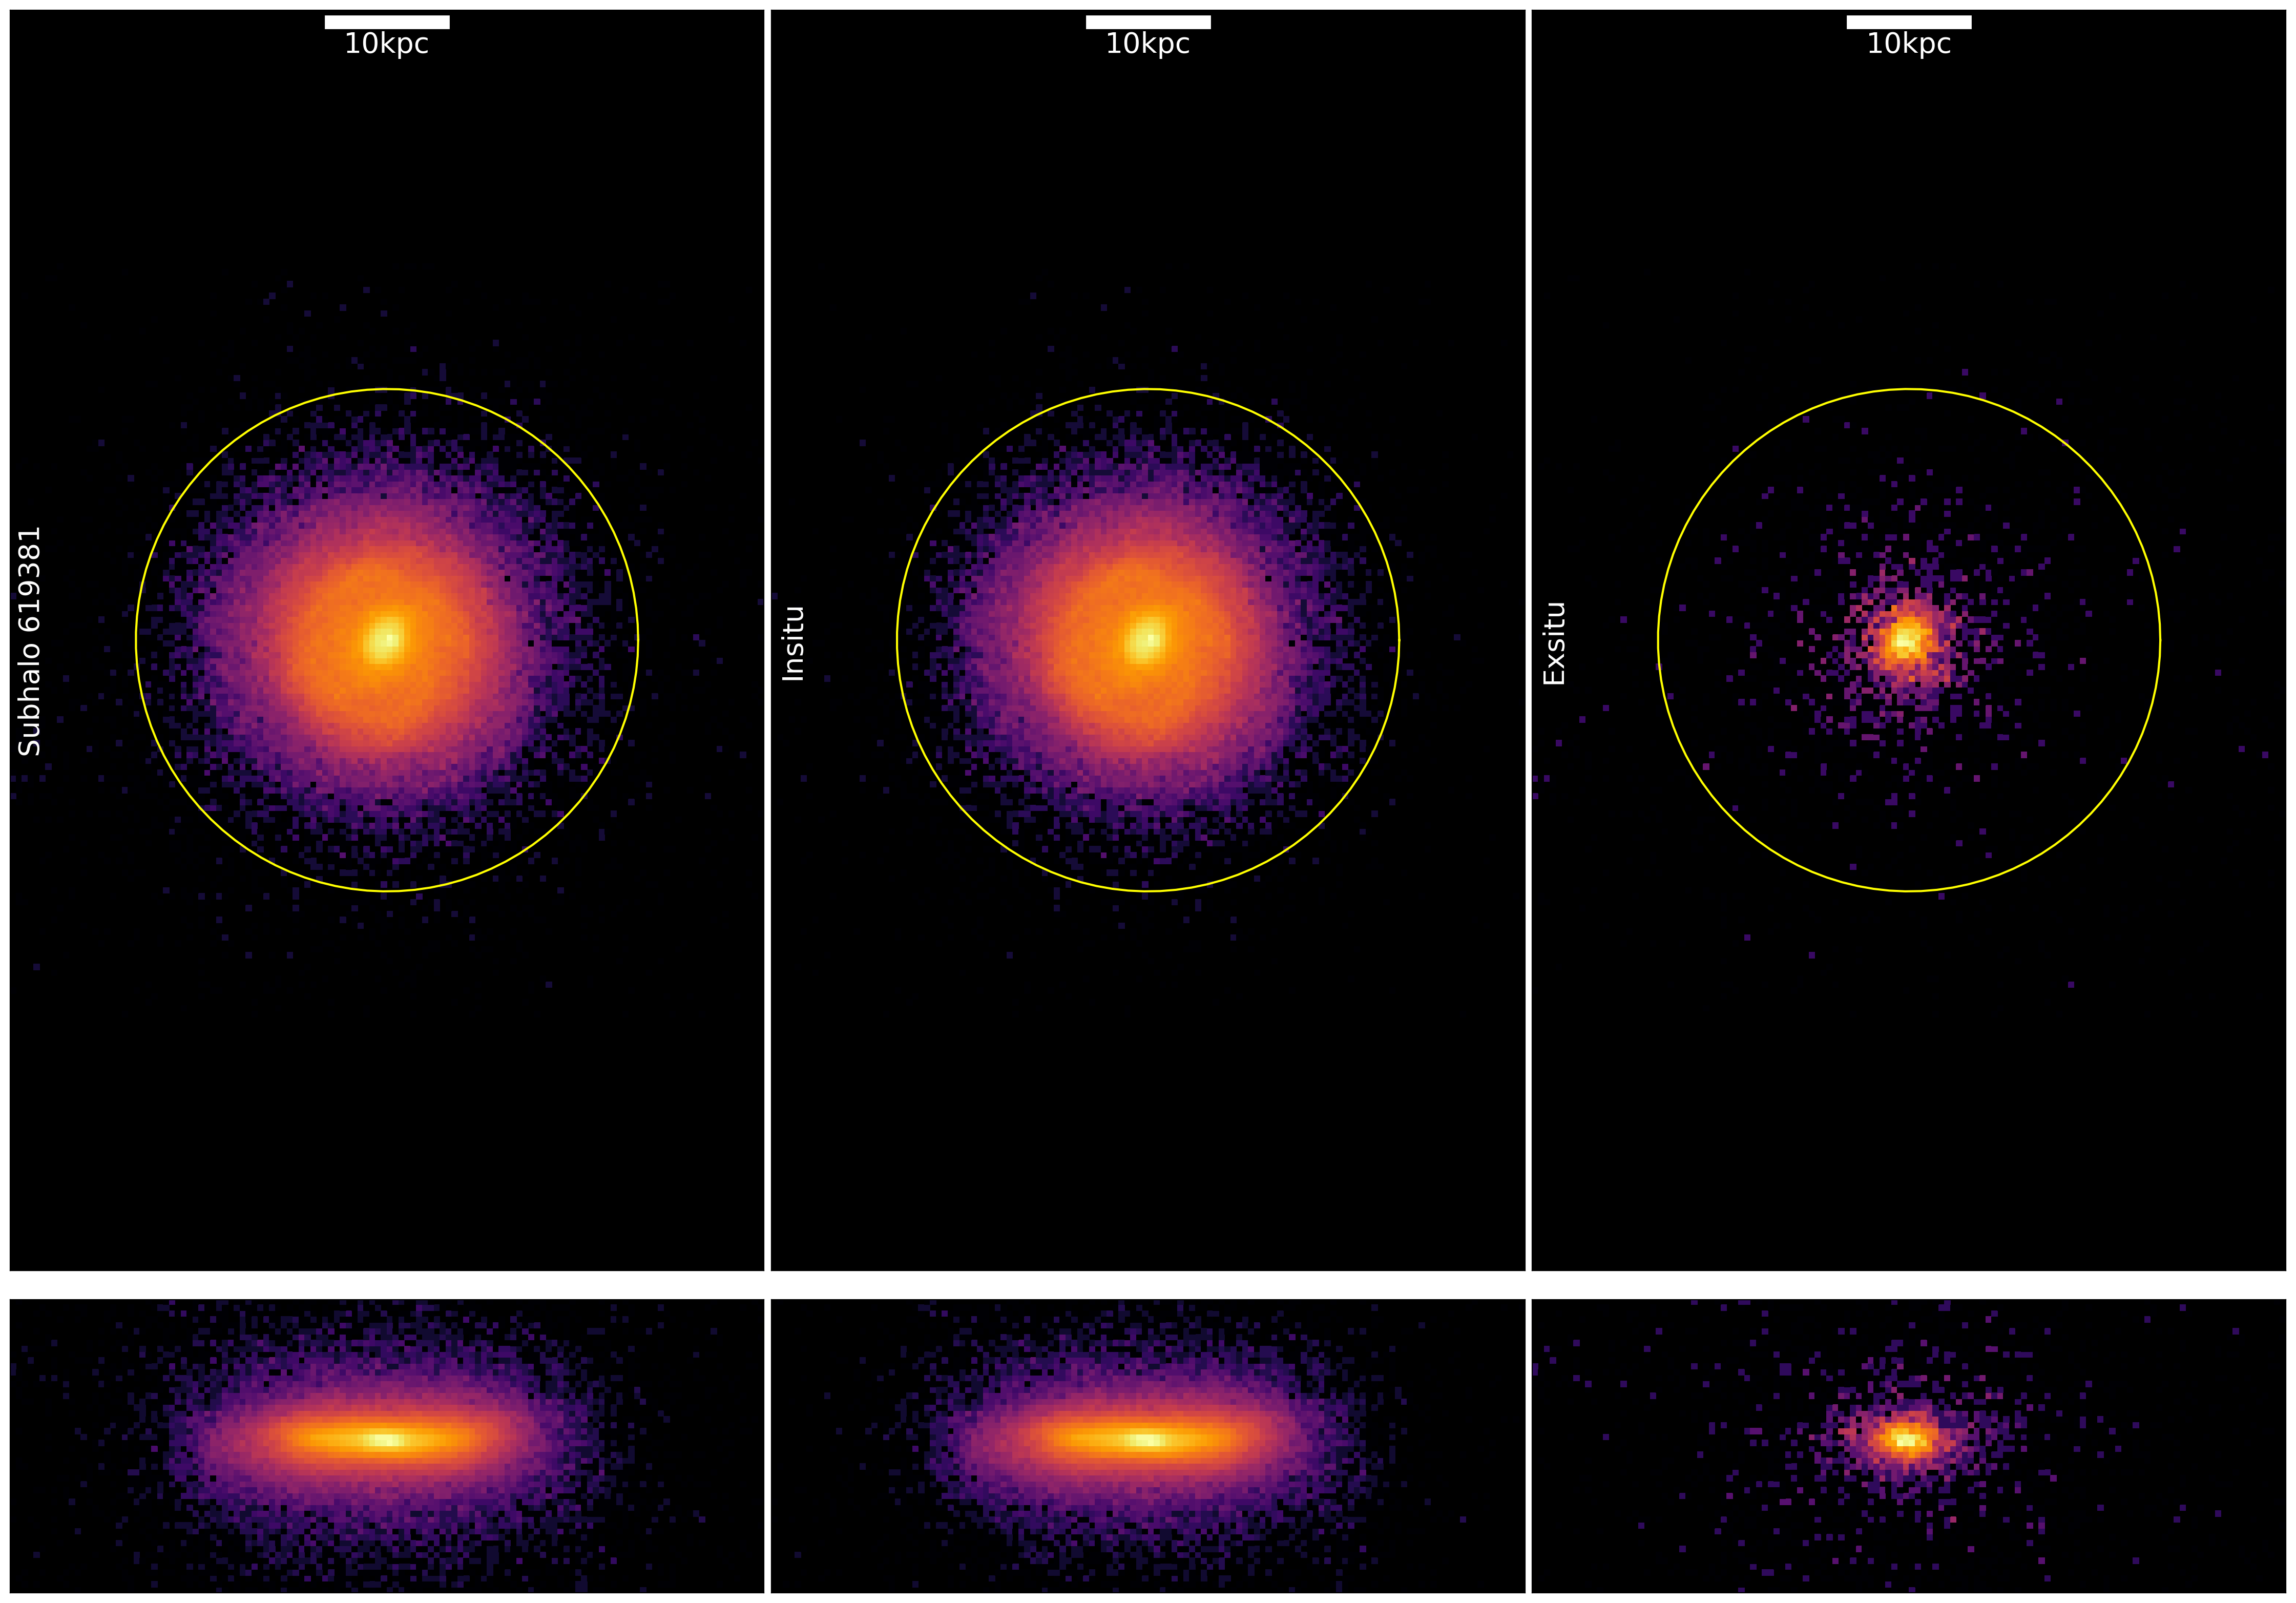

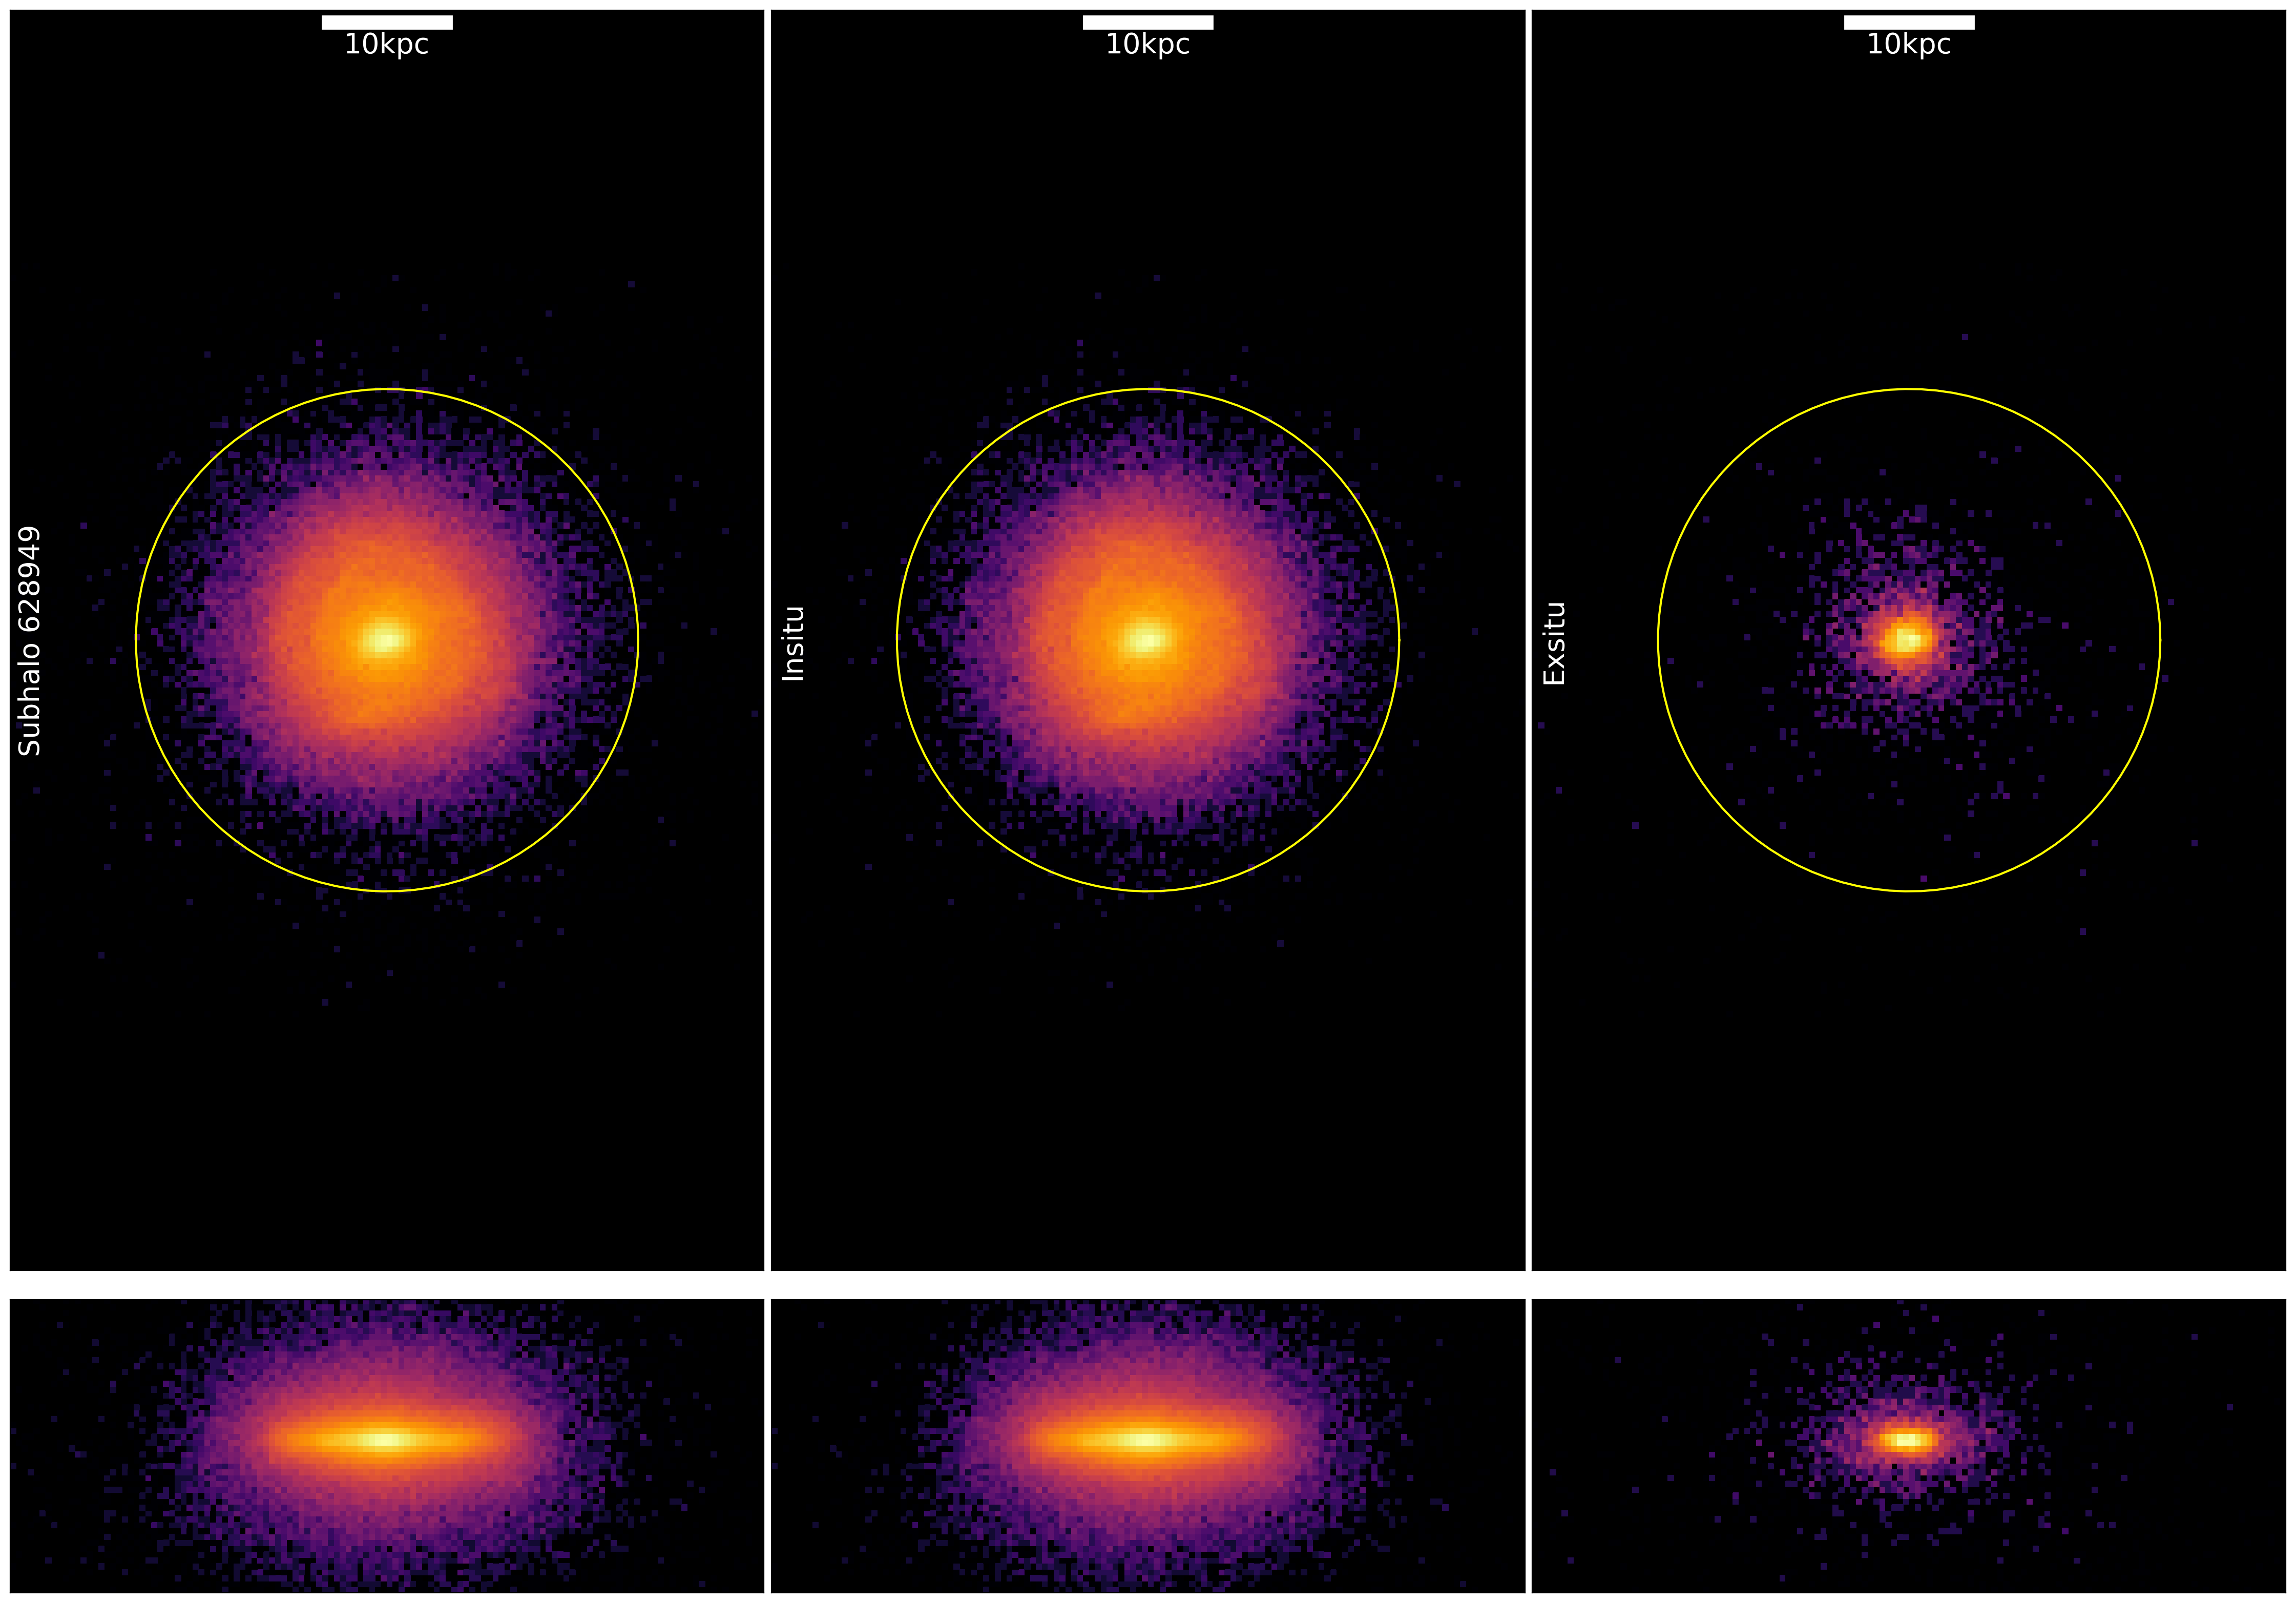

In [5]:
subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
R200_list = [ 179.21212769,  167.076828  ,  169.57954407,  146.69950867, 140.94436646,  119.15261841,  123.67668915,  120.26761627, 119.03757477,  111.41501617,  108.23468781,  101.64916229, 97.0650177]

for indice in range(1,13):
    subhaloid = subhaloid_list[indice]
    R200 = R200_list[indice]
    plot_total_insitu_exsitu(subhaloid,R200,data_rodriguez)
    print(indice)